<a href="https://colab.research.google.com/github/dadakhalander/clustering/blob/main/ml_ass_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LIBRARIES

In [ ]:
# Import the necessary module
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Data Preparation & Cleaning

###Load & Inspect Data

In [ ]:
df = pd.read_csv('/content/E_Commerce_Data_Set_4034.csv')

In [ ]:
df.head()

Genre   Age  Annual_Income (£K)  Spending_Score
0    Male  24.0                62.0            13.0
1    Male  52.0                59.0            35.0
2  Female  42.0                31.0            12.0
3  Female  20.0                92.0            41.0
4  Female  30.0                52.0            40.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Genre               800 non-null    object 
 1   Age                 775 non-null    float64
 2   Annual_Income (£K)  781 non-null    float64
 3   Spending_Score      785 non-null    float64
dtypes: float64(3), object(1)
memory usage: 25.1+ KB


In [ ]:
# checking null values
df.isnull().sum()

Genre                  0
Age                   25
Annual_Income (£K)    19
Spending_Score        15
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(252)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(548, 4)

In [ ]:
# Summary statistics for numerical columns
df[['Age', 'Annual_Income (£K)', 'Spending_Score']].describe().T

count       mean        std   min    25%   50%   75%  \
Age                 528.0  42.429924  14.212097  18.0  29.75  43.0  55.0   
Annual_Income (£K)  534.0  69.086142  29.622327  17.0  46.00  67.0  94.0   
Spending_Score      538.0  30.773234  18.054250   1.0  14.00  31.0  46.0   

                      max  
Age                  68.0  
Annual_Income (£K)  141.0  
Spending_Score       67.0

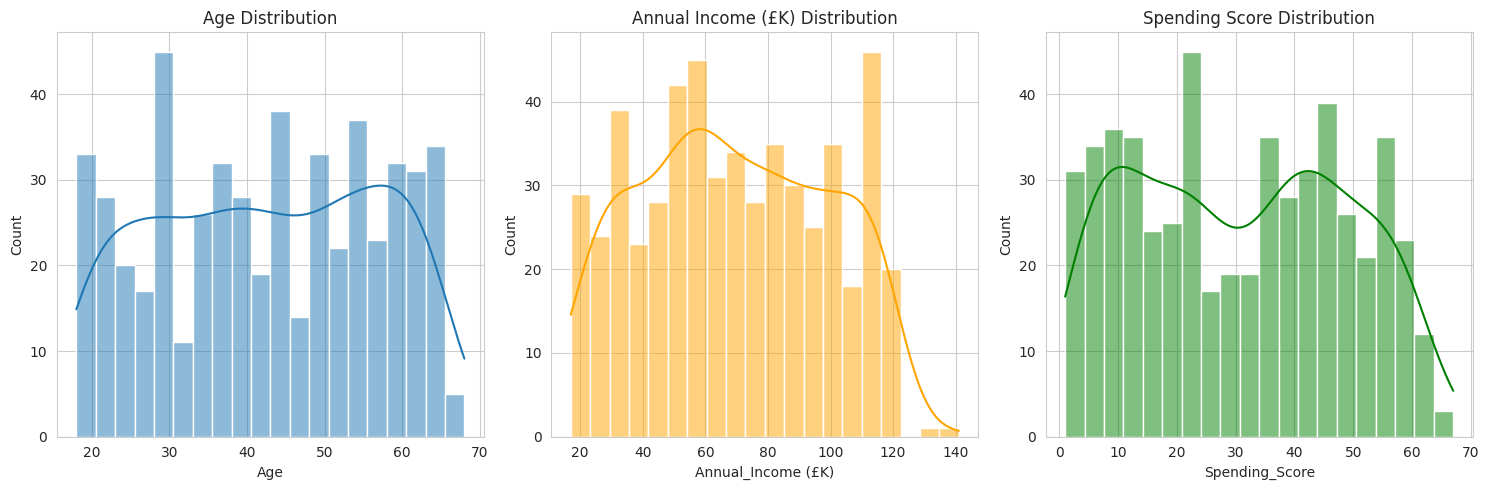

In [ ]:
# Visualizing distributions
plt.figure(figsize=(15, 5))

# Age Distribution
plt.subplot(1, 3, 1)
sns.histplot(df['Age'].dropna(), bins=20, kde=True)
plt.title('Age Distribution')

# Annual Income Distribution
plt.subplot(1, 3, 2)
sns.histplot(df['Annual_Income (£K)'].dropna(), bins=20, kde=True, color='orange')
plt.title('Annual Income (£K) Distribution')

# Spending Score Distribution
plt.subplot(1, 3, 3)
sns.histplot(df['Spending_Score'].dropna(), bins=20, kde=True, color='green')
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

###  Handle Missing Values

In [ ]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)  # Choose 5 closest neighbors
df[['Age', 'Annual_Income (£K)', 'Spending_Score']] = knn_imputer.fit_transform(df[['Age', 'Annual_Income (£K)', 'Spending_Score']])


In [ ]:
df.isnull().sum()

Genre                 0
Age                   0
Annual_Income (£K)    0
Spending_Score        0
dtype: int64

### outliers and Z- score

In [ ]:
# Identify outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers


outliers = detect_outliers_iqr(df, 'Annual_Income (£K)')

# Now you can count the outliers
outliers.count()

Genre                 0
Age                   0
Annual_Income (£K)    0
Spending_Score        0
dtype: int64

### Convert Categorical Variables

In [ ]:
# Assuming 'Genre' is the column name for male/female
df = pd.get_dummies(df, columns=['Genre'], prefix=['Gender'])
df.head()

Age  Annual_Income (£K)  Spending_Score  Gender_Female  Gender_Male
0  24.0                62.0            13.0          False         True
1  52.0                59.0            35.0          False         True
2  42.0                31.0            12.0           True        False
3  20.0                92.0            41.0           True        False
4  30.0                52.0            40.0           True        False

In [ ]:
df0 = df.copy()  # Create a copy of the original DataFrame


In [ ]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548 entries, 0 to 799
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 548 non-null    float64
 1   Annual_Income (£K)  548 non-null    float64
 2   Spending_Score      548 non-null    float64
 3   Gender_Female       548 non-null    bool   
 4   Gender_Male         548 non-null    bool   
dtypes: bool(2), float64(3)
memory usage: 18.2 KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548 entries, 0 to 799
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 548 non-null    float64
 1   Annual_Income (£K)  548 non-null    float64
 2   Spending_Score      548 non-null    float64
 3   Gender_Female       548 non-null    bool   
 4   Gender_Male         548 non-null    bool   
dtypes: bool(2), float64(3)
memory usage: 18.2 KB


### Scale Data

In [ ]:
# Select numerical columns for scaling
num_cols = ['Age', 'Annual_Income (£K)', 'Spending_Score']

In [ ]:
num_cols

['Age', 'Annual_Income (£K)', 'Spending_Score']

In [ ]:
# Choose a StandardScaler or MinMaxScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# now dataset is  transformed
df.head()

Age  Annual_Income (£K)  Spending_Score  Gender_Female  Gender_Male
0 -1.320898           -0.240995       -0.988880          False         True
1  0.684590           -0.343472        0.239375          False         True
2 -0.031656           -1.299924       -1.044709           True        False
3 -1.607396            0.783774        0.574354           True        False
4 -0.891151           -0.582585        0.518524           True        False

### OLS TEST

In [ ]:
# Define dependent variable (Y) and independent variables (X)
Y1 = df["Spending_Score"]
X1 = df[["Age", "Annual_Income (£K)", "Gender_Male"]]

In [ ]:
# Add a constant for the intercept
X1 = sm.add_constant(X1)

In [ ]:
# Ensure all columns in X1 are numeric
X1 = X1.astype(float)

In [ ]:
# Fit OLS model
model = sm.OLS(Y1, X1).fit()

In [ ]:
# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Spending_Score   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     3.114
Date:                Wed, 16 Apr 2025   Prob (F-statistic):             0.0259
Time:                        14:43:45   Log-Likelihood:                -772.91
No. Observations:                 548   AIC:                             1554.
Df Residuals:                     544   BIC:                             1571.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0346      0

In [ ]:
# Calculate VIF(Variance Inflation Factor) for each variable
vif_data = pd.DataFrame()
vif_data["Feature"] = X1.columns
vif_data["VIF"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]

print(vif_data)

              Feature       VIF
0               const  1.786832
1                 Age  1.006594
2  Annual_Income (£K)  1.006872
3         Gender_Male  1.002314


# Exploratory Data Analysis (EDA)

### Visualize Feature Distributions

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548 entries, 0 to 799
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 548 non-null    float64
 1   Annual_Income (£K)  548 non-null    float64
 2   Spending_Score      548 non-null    float64
 3   Gender_Female       548 non-null    bool   
 4   Gender_Male         548 non-null    bool   
dtypes: bool(2), float64(3)
memory usage: 18.2 KB


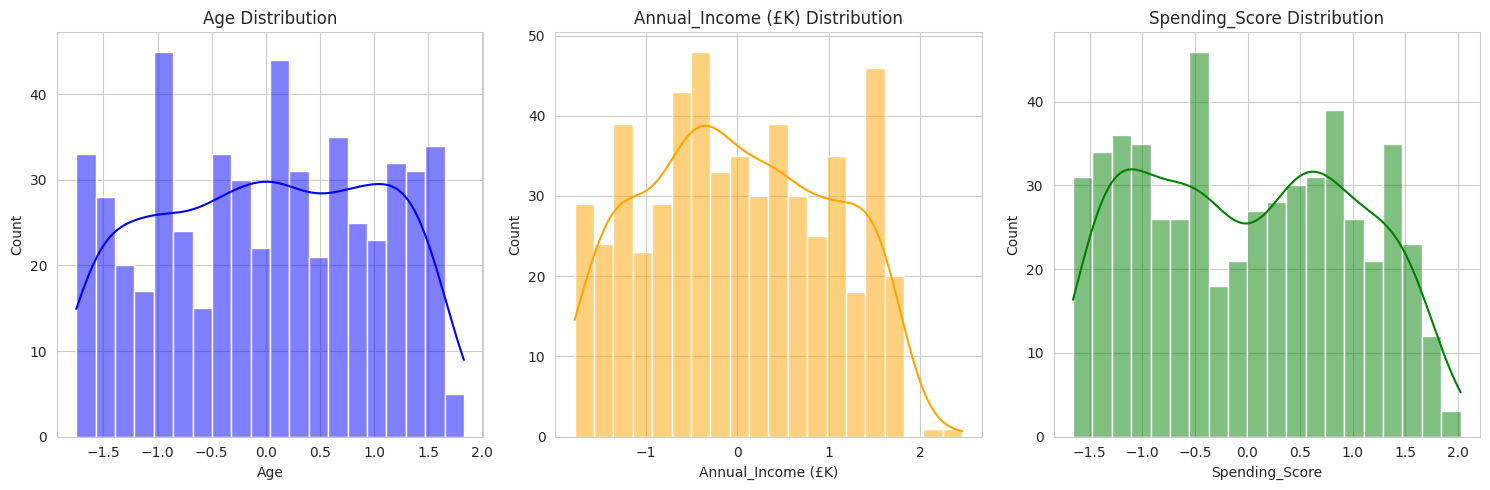

In [ ]:
# Set style for plots
sns.set_style("whitegrid")
# Histograms & KDE Plots
plt.figure(figsize=(15, 5))

for i, col in enumerate(df[['Age', 'Annual_Income (£K)', 'Spending_Score']]):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], bins=20, kde=True, color=['blue', 'orange', 'green'][i])
    plt.title(f'{col} Distribution')

plt.tight_layout()
plt.show()

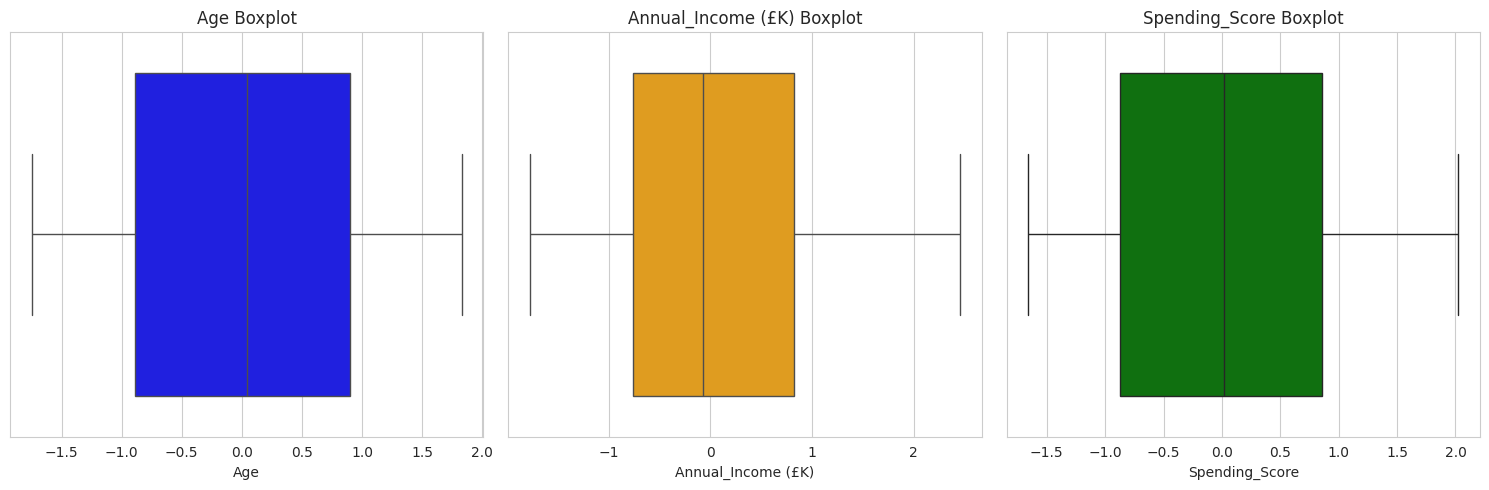

In [ ]:
# Boxplots for Outliers
plt.figure(figsize=(15, 5))

for i, col in enumerate(df[['Age', 'Annual_Income (£K)', 'Spending_Score']]):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=df[col], color=['blue', 'orange', 'green'][i])
    plt.title(f'{col} Boxplot')

plt.tight_layout()
plt.show()

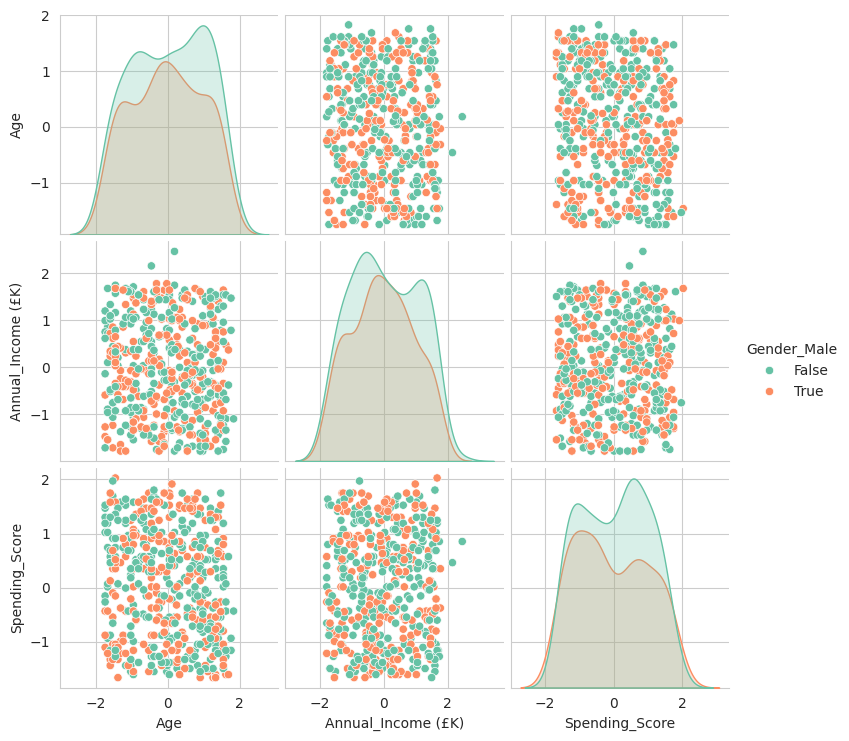

In [ ]:
#  Pairplot to Identify Relationships
sns.pairplot(df[['Age', 'Annual_Income (£K)', 'Spending_Score', 'Gender_Male']], hue='Gender_Male', palette='Set2')
plt.show()

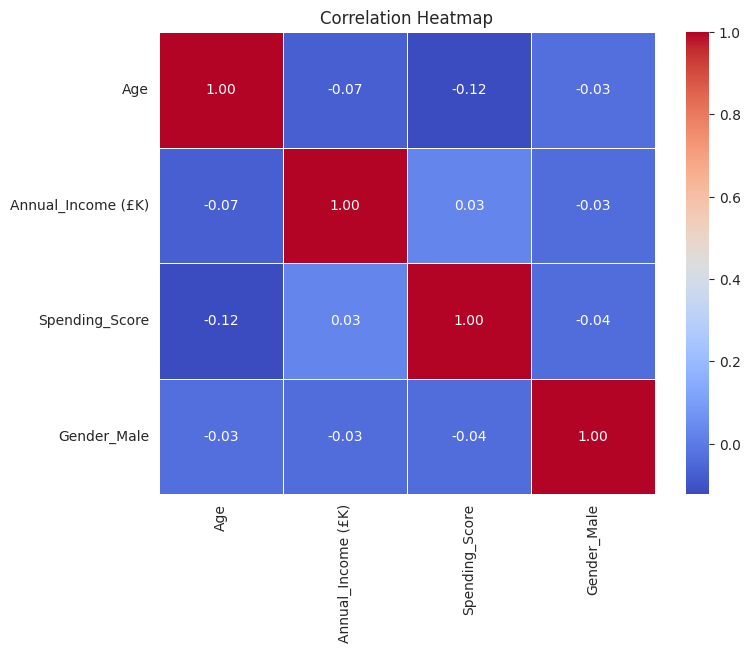

In [ ]:
#  Correlation Heatmap
plt.figure(figsize=(8, 6))
corr = df[['Age', 'Annual_Income (£K)', 'Spending_Score','Gender_Male']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Dimensionality Reduction (Optional)

In [ ]:
# Select numerical columns for dimensionality reduction
features = ['Age', 'Annual_Income (£K)', 'Spending_Score']
X = df[features]

In [ ]:
# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(X)

In [ ]:
X

Age  Annual_Income (£K)  Spending_Score
0   -1.320898           -0.240995       -0.988880
1    0.684590           -0.343472        0.239375
2   -0.031656           -1.299924       -1.044709
3   -1.607396            0.783774        0.574354
4   -0.891151           -0.582585        0.518524
..        ...                 ...             ...
795  0.197543            0.373866       -0.653901
796 -1.034400           -0.650903        0.183545
797  0.326467            1.022887       -1.603007
798 -0.389779            0.134753        1.411800
799  0.612965           -1.436560        1.467630

[548 rows x 3 columns]

In [ ]:
df_pca

array([[-0.1857495 ,  0.1470828 ],
       [ 0.4628267 , -0.34336869],
       [ 1.16909962, -0.60195183],
       ...,
       [ 0.74602501,  1.71304929],
       [-1.17165636, -0.62791464],
       [ 0.14421657, -1.90356556]])

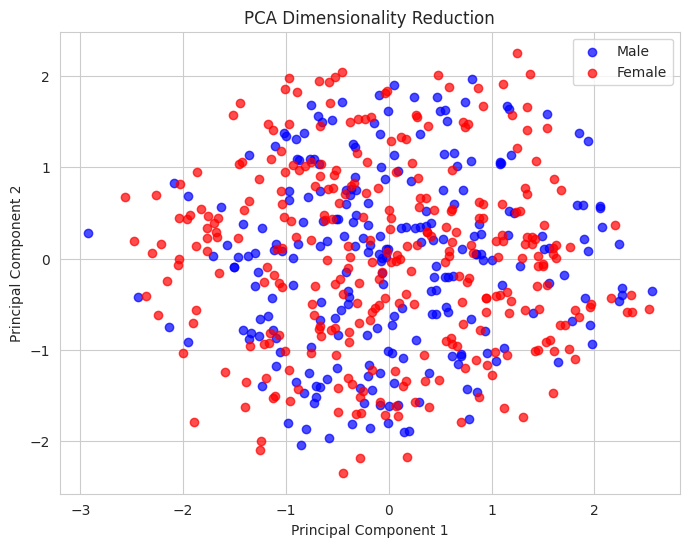

In [ ]:
# Scatter plot of PCA-reduced data
plt.figure(figsize=(8, 6))

# Separate data points for male and female
male_indices = df['Gender_Male'] == 1
female_indices = df['Gender_Male'] == 0

# Plot male and female data points with different colors and labels
plt.scatter(df_pca[male_indices, 0], df_pca[male_indices, 1],
            c='blue', alpha=0.7, label='Male')
plt.scatter(df_pca[female_indices, 0], df_pca[female_indices, 1],
            c='red', alpha=0.7, label='Female')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Dimensionality Reduction")
plt.grid(True)

# Add legend to the plot
plt.legend()

plt.show()

In [ ]:
# Explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)
print("Explained Variance Ratio:", explained_variance)

Explained Variance Ratio: [0.38574296 0.71028724]


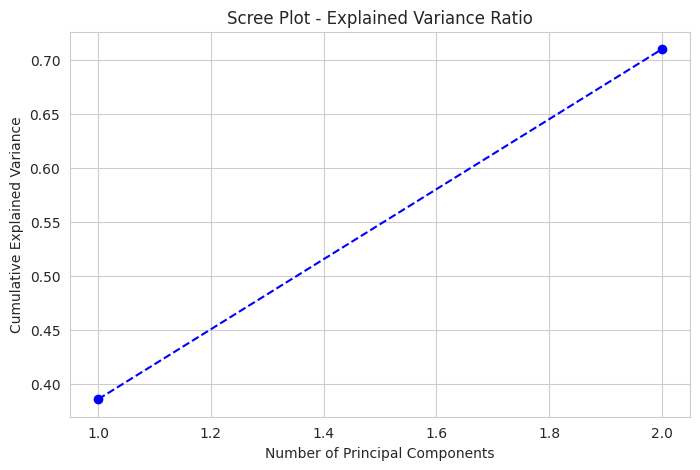

In [ ]:
# Plot Scree Plot
plt.figure(figsize=(8, 5))
# Change len(features) to pca.n_components_ to match explained_variance shape
plt.plot(range(1, pca.n_components_ + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot - Explained Variance Ratio")
plt.grid(True)
plt.show()

## t-SNE

• Unlike PCA (which captures variance), t-SNE
is non-linear and focuses on preserving local relationships.

• Great for clustering visualization when data has complex structures.

In [ ]:
X

Age  Annual_Income (£K)  Spending_Score
0   -1.320898           -0.240995       -0.988880
1    0.684590           -0.343472        0.239375
2   -0.031656           -1.299924       -1.044709
3   -1.607396            0.783774        0.574354
4   -0.891151           -0.582585        0.518524
..        ...                 ...             ...
795  0.197543            0.373866       -0.653901
796 -1.034400           -0.650903        0.183545
797  0.326467            1.022887       -1.603007
798 -0.389779            0.134753        1.411800
799  0.612965           -1.436560        1.467630

[548 rows x 3 columns]

In [ ]:
# Apply t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
df_tsne = tsne.fit_transform(X)

In [ ]:
# Convert to DataFrame for plotting
df_tsne = pd.DataFrame(df_tsne, columns=["t-SNE Component 1", "t-SNE Component 2"])

In [ ]:
df_tsne

t-SNE Component 1  t-SNE Component 2
0             7.699387          13.777788
1             1.913331          -0.737840
2            10.431880         -12.573306
3           -22.350677          -1.818614
4            -6.277596         -12.526223
..                 ...                ...
543           7.215080           7.037626
544          -4.160681         -12.005442
545           1.639659          23.292273
546         -13.539537          -7.306520
547          -0.879268         -23.236490

[548 rows x 2 columns]

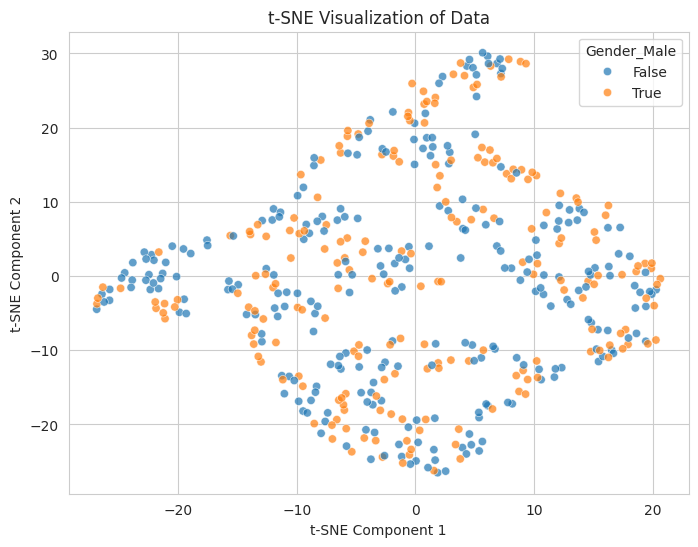

In [ ]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_tsne["t-SNE Component 1"], y=df_tsne["t-SNE Component 2"],hue=df['Gender_Male'] ,alpha=0.7, color="blue")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization of Data")
plt.grid(True)
plt.show()

# Model Selection & Clustering Analysis


### K-Means Clustering

In [ ]:
X

Age  Annual_Income (£K)  Spending_Score
0   -1.320898           -0.240995       -0.988880
1    0.684590           -0.343472        0.239375
2   -0.031656           -1.299924       -1.044709
3   -1.607396            0.783774        0.574354
4   -0.891151           -0.582585        0.518524
..        ...                 ...             ...
795  0.197543            0.373866       -0.653901
796 -1.034400           -0.650903        0.183545
797  0.326467            1.022887       -1.603007
798 -0.389779            0.134753        1.411800
799  0.612965           -1.436560        1.467630

[548 rows x 3 columns]

In [ ]:
#  Finding optimal K using the Elbow Method
inertia = []
sil_scores = []
K_range = range(2, 11)  # Trying K from 2 to 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, kmeans.labels_))

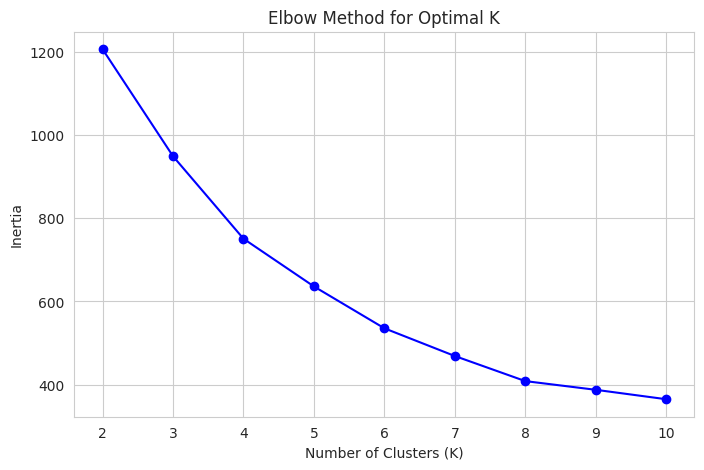

In [ ]:
# Elbow Plot
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', color='b', label='Inertia')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

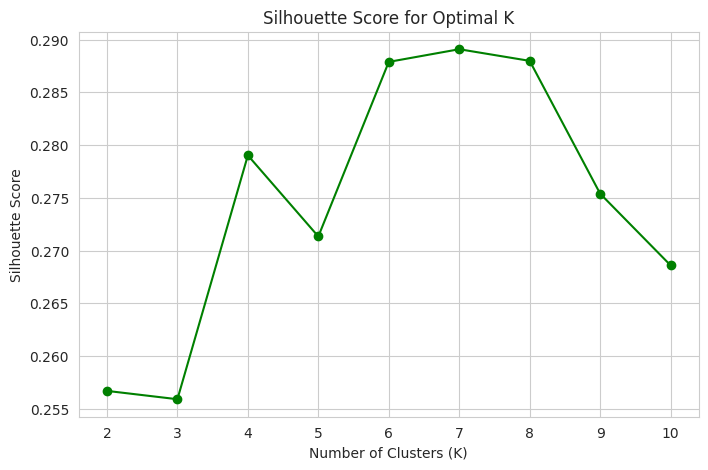

In [ ]:
# Silhouette Score Plot
plt.figure(figsize=(8, 5))
plt.plot(K_range, sil_scores, marker='o', color='g', label='Silhouette Score')
plt.title("Silhouette Score for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

In [ ]:
#  Apply K-Means with the optimal K (let's assume K=4 based on the plots)
kmeans = KMeans(n_clusters=6, random_state=42)
df['Cluster_k'] = kmeans.fit_predict(X)

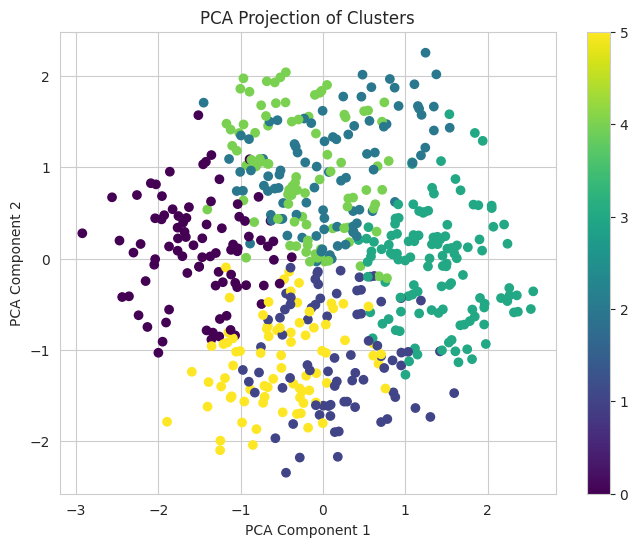

In [ ]:
#  Visualize the clusters using PCA (2D projection)


plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster_k'], cmap='viridis')
plt.title("PCA Projection of Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar()
plt.show()

Cluster Centroids

In [ ]:
# Check the centroids of the clusters
centroids = kmeans.cluster_centers_

# Since the data was standardized, you can inverse-transform the centroids to get them in the original scale
centroids_original = scaler.inverse_transform(centroids)

# Display the centroids

centroid_df = pd.DataFrame(centroids_original, columns=num_cols)
print("Cluster Centroids:")
print(centroid_df)

Cluster Centroids:
         Age  Annual_Income (£K)  Spending_Score
0  30.632184           91.708046       48.303448
1  51.700000           46.971795       48.294872
2  54.606593          100.230769       31.661538
3  53.504918           48.208197       14.424590
4  31.287912           87.336264       13.595604
5  28.058228           41.136709       37.756962


In [ ]:
# Calculate the mean for each feature per cluster
cluster_means = df.groupby('Cluster_k').mean()
print("Cluster Means:")
cluster_means


Cluster Means:


Age  Annual_Income (£K)  Spending_Score  Gender_Female  \
Cluster_k                                                                
0         -0.845871            0.773801        0.982104       0.597701   
1          0.663102           -0.754344        0.981625       0.551282   
2          0.871286            1.064929        0.052990       0.582418   
3          0.792379           -0.712109       -0.909345       0.590164   
4         -0.798905            0.624466       -0.955627       0.494505   
5         -1.030229           -0.953664        0.393296       0.531646   

           Gender_Male  
Cluster_k               
0             0.402299  
1             0.448718  
2             0.417582  
3             0.409836  
4             0.505495  
5             0.468354

In [ ]:
#  Evaluate the clustering with the silhouette score
sil_score = silhouette_score(X, df['Cluster_k'])
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.28789111134891426


In [ ]:


for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"k={k}, Silhouette Score={score}")


k=2, Silhouette Score=0.2565413332311652
k=3, Silhouette Score=0.2602143330422345
k=4, Silhouette Score=0.2793178600737008
k=5, Silhouette Score=0.2809395037414873
k=6, Silhouette Score=0.2897184877867222
k=7, Silhouette Score=0.2728051473795517
k=8, Silhouette Score=0.2851717386131105
k=9, Silhouette Score=0.28025842768893255


In [ ]:
from sklearn.metrics import davies_bouldin_score

# Davies-Bouldin Index
db_score = davies_bouldin_score(X, df['Cluster_k'])
print(f"Davies-Bouldin Index: {db_score}")


Davies-Bouldin Index: 1.0038508437967457


In [ ]:
df

Age  Annual_Income (£K)  Spending_Score  Gender_Female  Gender_Male  \
0   -1.320898           -0.240995       -0.988880          False         True   
1    0.684590           -0.343472        0.239375          False         True   
2   -0.031656           -1.299924       -1.044709           True        False   
3   -1.607396            0.783774        0.574354           True        False   
4   -0.891151           -0.582585        0.518524           True        False   
..        ...                 ...             ...            ...          ...   
795  0.197543            0.373866       -0.653901           True        False   
796 -1.034400           -0.650903        0.183545           True        False   
797  0.326467            1.022887       -1.603007          False         True   
798 -0.389779            0.134753        1.411800          False         True   
799  0.612965           -1.436560        1.467630          False         True   

     Cluster_k  
0            4  
1            1  
2            3  
3            0  
4            5  
..         ...  
795          4  
796          5  
797          4  
798          0  
799          1  

[548 rows x 6 columns]

In [ ]:
df0

Age  Annual_Income (£K)  Spending_Score  Gender_Female  Gender_Male
0    24.0                62.0            13.0          False         True
1    52.0                59.0            35.0          False         True
2    42.0                31.0            12.0           True        False
3    20.0                92.0            41.0           True        False
4    30.0                52.0            40.0           True        False
..    ...                 ...             ...            ...          ...
795  45.2                80.0            19.0           True        False
796  28.0                50.0            34.0           True        False
797  47.0                99.0             2.0          False         True
798  37.0                73.0            56.0          False         True
799  51.0                27.0            57.0          False         True

[548 rows x 5 columns]

In [ ]:
df0 = df0.reset_index(drop=True)
df = df.reset_index(drop=True)


# Add the 'Age' column from 'df0' to 'df'
df['Age_original'] = df0['Age']
df.head()


Age  Annual_Income (£K)  Spending_Score  Gender_Female  Gender_Male  \
0 -1.320898           -0.240995       -0.988880          False         True   
1  0.684590           -0.343472        0.239375          False         True   
2 -0.031656           -1.299924       -1.044709           True        False   
3 -1.607396            0.783774        0.574354           True        False   
4 -0.891151           -0.582585        0.518524           True        False   

   Cluster_k  Age_original  
0          4          24.0  
1          1          52.0  
2          3          42.0  
3          0          20.0  
4          5          30.0

In [ ]:
df['Annual_Income (£K)_original'] = df0['Annual_Income (£K)']


In [ ]:
df['Spending_Score_original'] = df0['Spending_Score']

In [ ]:
df

Age  Annual_Income (£K)  Spending_Score  Gender_Female  Gender_Male  \
0   -1.320898           -0.240995       -0.988880          False         True   
1    0.684590           -0.343472        0.239375          False         True   
2   -0.031656           -1.299924       -1.044709           True        False   
3   -1.607396            0.783774        0.574354           True        False   
4   -0.891151           -0.582585        0.518524           True        False   
..        ...                 ...             ...            ...          ...   
543  0.197543            0.373866       -0.653901           True        False   
544 -1.034400           -0.650903        0.183545           True        False   
545  0.326467            1.022887       -1.603007          False         True   
546 -0.389779            0.134753        1.411800          False         True   
547  0.612965           -1.436560        1.467630          False         True   

     Cluster_k  Age_original  Annual_Income (£K)_original  \
0            4          24.0                         62.0   
1            1          52.0                         59.0   
2            3          42.0                         31.0   
3            0          20.0                         92.0   
4            5          30.0                         52.0   
..         ...           ...                          ...   
543          4          45.2                         80.0   
544          5          28.0                         50.0   
545          4          47.0                         99.0   
546          0          37.0                         73.0   
547          1          51.0                         27.0   

     Spending_Score_original  
0                       13.0  
1                       35.0  
2                       12.0  
3                       41.0  
4                       40.0  
..                       ...  
543                     19.0  
544                     34.0  
545                      2.0  
546                     56.0  
547                     57.0  

[548 rows x 9 columns]

In [ ]:


# Group data by cluster
grouped = df.groupby('Cluster_k')

# Iterate through each cluster
for cluster_label, cluster_data in grouped:
    print(f"Cluster {cluster_label}:")
    print(cluster_data) # Print or process each cluster individually
    # Example: Calculate and print the mean age for the cluster
    print(f"Mean Age in cluster {cluster_label}: {cluster_data['Age_original'].mean()}")
    print("-" * 20) # Separator between clusters


Cluster 0:
          Age  Annual_Income (£K)  Spending_Score  Gender_Female  Gender_Male  \
3   -1.607396            0.783774        0.574354           True        False   
9   -0.747902            0.544661        0.574354           True        False   
19  -1.679021            1.671908        1.188481           True        False   
31  -1.750645           -0.138518        1.467630           True        False   
38  -1.177649            1.057046        0.686013           True        False   
..        ...                 ...             ...            ...          ...   
527 -0.962775            1.022887        1.300141           True        False   
530 -0.461403            0.442184        1.020992           True        False   
534 -0.389779            0.360203        1.076822           True        False   
539 -0.819526            1.535272        0.351035           True        False   
546 -0.389779            0.134753        1.411800          False         True   

     Cluster_k  

In [ ]:
# Store the output in a dictionary
cluster_k_info = {}

# Group data by cluster
grouped = df.groupby('Cluster_k')

# Iterate through each cluster
for cluster_label, cluster_data in grouped:
    cluster_info[cluster_label] = {}
    cluster_info[cluster_label]['data'] = cluster_data
    cluster_info[cluster_label]['mean_age'] = cluster_data['Age_original'].mean()



### Hierarchical Clustering

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          548 non-null    float64
 1   Annual_Income (£K)           548 non-null    float64
 2   Spending_Score               548 non-null    float64
 3   Gender_Female                548 non-null    bool   
 4   Gender_Male                  548 non-null    bool   
 5   Cluster_k                    548 non-null    int32  
 6   Age_original                 548 non-null    float64
 7   Annual_Income (£K)_original  548 non-null    float64
 8   Spending_Score_original      548 non-null    float64
dtypes: bool(2), float64(6), int32(1)
memory usage: 29.0 KB


In [ ]:
X # scaled data

Age  Annual_Income (£K)  Spending_Score
0   -1.320898           -0.240995       -0.988880
1    0.684590           -0.343472        0.239375
2   -0.031656           -1.299924       -1.044709
3   -1.607396            0.783774        0.574354
4   -0.891151           -0.582585        0.518524
..        ...                 ...             ...
795  0.197543            0.373866       -0.653901
796 -1.034400           -0.650903        0.183545
797  0.326467            1.022887       -1.603007
798 -0.389779            0.134753        1.411800
799  0.612965           -1.436560        1.467630

[548 rows x 3 columns]

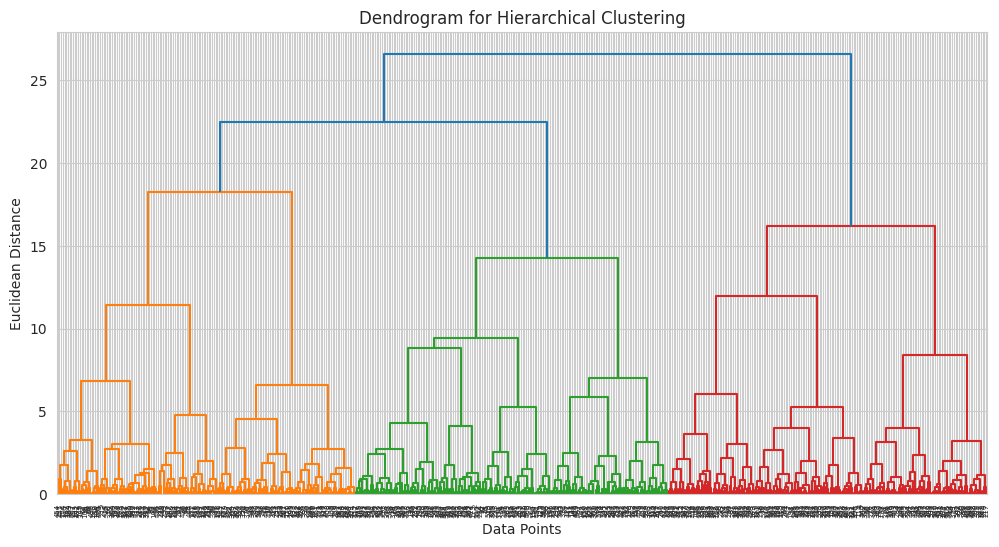

In [ ]:
# Perform hierarchical clustering
linked = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


In [ ]:
# Choosing a cluster count (e.g., 3)
num_clusters = 3
clusters = fcluster(linked, num_clusters, criterion='maxclust')

In [ ]:
# Add clusters to dataframe
df["Cluster_h"] = clusters

Silhouette Score (Quantitative Evaluation)

In [ ]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster

# Test different cluster sizes and compute silhouette scores
silhouette_scores = []
for num_clusters in range(2, 10):  # Testing 2 to 10 clusters
    clusters = fcluster(linked, num_clusters, criterion='maxclust')
    score = silhouette_score(X, clusters)
    silhouette_scores.append(score)

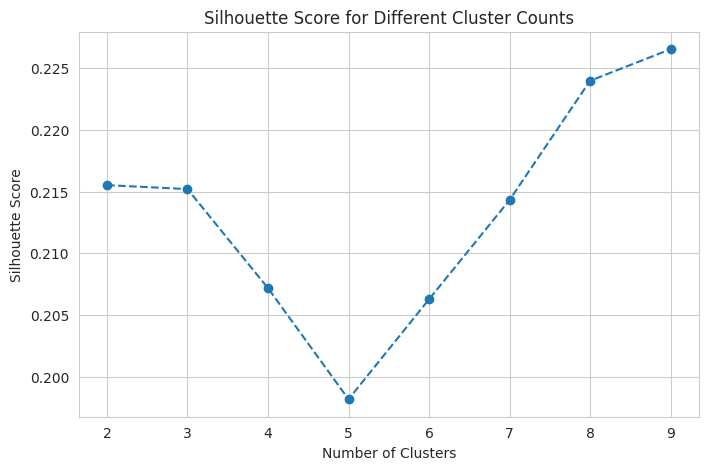

In [ ]:
# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), silhouette_scores, marker='o', linestyle='dashed')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Cluster Counts")
plt.show()

In [ ]:
# Optimal number of clusters
optimal_clusters = range(2, 10)[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_clusters}")

Optimal number of clusters: 9


Cluster Heatmap

<Figure size 1000x600 with 0 Axes>

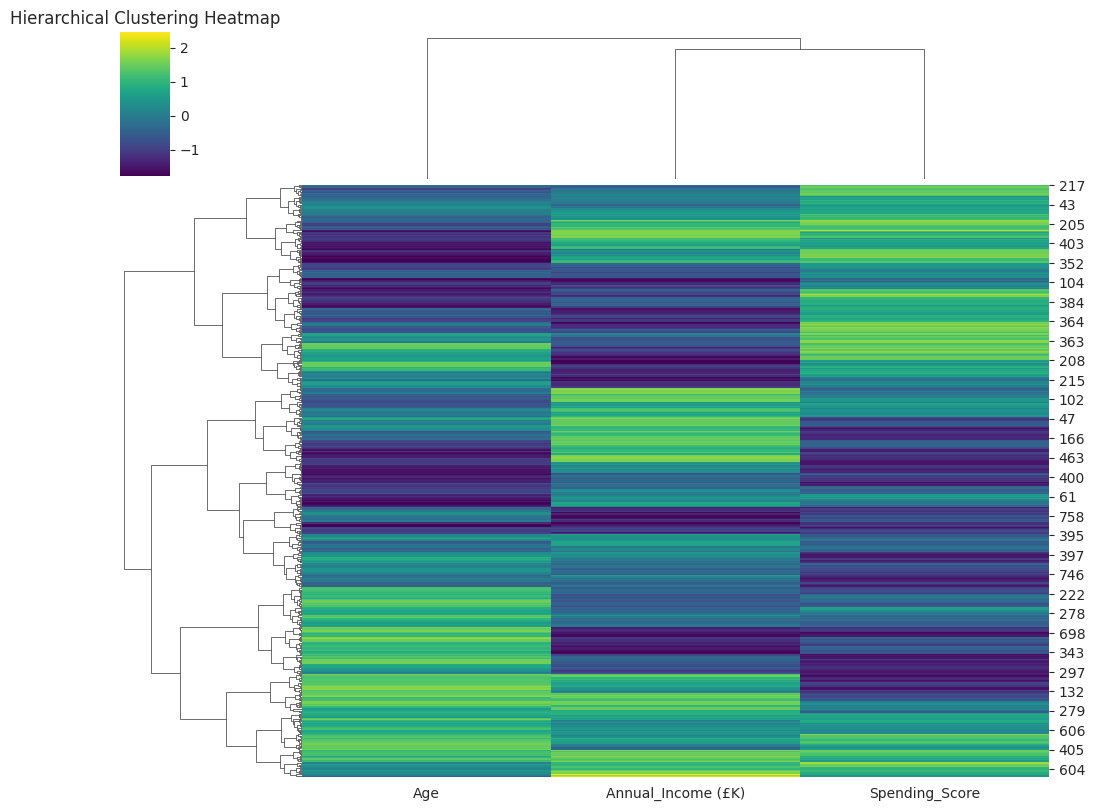

In [ ]:
import seaborn as sns
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 6))
sns.clustermap(pd.DataFrame(X, columns=features), method='ward', cmap='viridis', figsize=(10, 8))
plt.title("Hierarchical Clustering Heatmap")
plt.show()


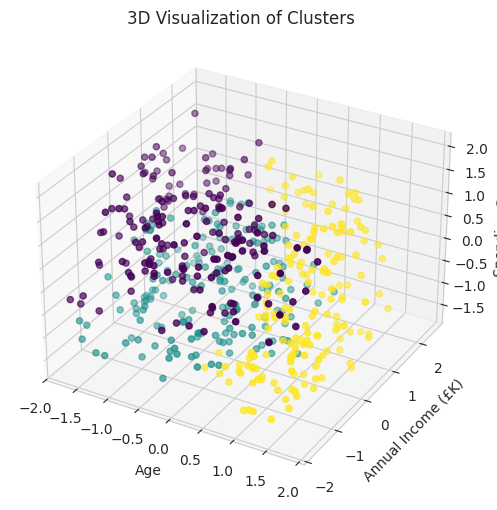

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df["Age"], df["Annual_Income (£K)"], df["Spending_Score"], c=df["Cluster_h"], cmap='viridis')

ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (£K)")
ax.set_zlabel("Spending Score")
plt.title("3D Visualization of Clusters")
plt.show()


# Gaussian Mixture Models (GMM)

In [ ]:
# Determine the optimal number of clusters using BIC/AIC
bic_scores = []
aic_scores = []
sil_scores = []

for n in range(2, 10):  # Testing clusters from 2 to 10
    gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=42)
    gmm.fit(X)
    labels = gmm.predict(X)

    bic_scores.append(gmm.bic(X))
    aic_scores.append(gmm.aic(X))
    sil_scores.append(silhouette_score(X, labels))


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# X is your feature matrix (make sure it's scaled if needed)

k_values = range(2, 11)
silhouette_scores = []
aic_scores = []
bic_scores = []

for k in k_values:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X)
    labels = gmm.predict(X)

    sil_score = silhouette_score(X, labels)
    silhouette_scores.append(sil_score)
    aic_scores.append(gmm.aic(X))
    bic_scores.append(gmm.bic(X))

    print(f"k={k} | Silhouette: {sil_score:.4f} | AIC: {gmm.aic(X):.2f} | BIC: {gmm.bic(X):.2f}")


k=2 | Silhouette: 0.2548 | AIC: 4579.73 | BIC: 4661.55
k=3 | Silhouette: 0.2448 | AIC: 4571.43 | BIC: 4696.31
k=4 | Silhouette: 0.2645 | AIC: 4557.66 | BIC: 4725.60
k=5 | Silhouette: 0.2660 | AIC: 4531.67 | BIC: 4742.68
k=6 | Silhouette: 0.2781 | AIC: 4535.02 | BIC: 4789.09
k=7 | Silhouette: 0.2567 | AIC: 4460.09 | BIC: 4757.22
k=8 | Silhouette: 0.2517 | AIC: 4482.75 | BIC: 4822.95
k=9 | Silhouette: 0.1408 | AIC: 4413.91 | BIC: 4797.17
k=10 | Silhouette: 0.2017 | AIC: 4431.60 | BIC: 4857.92


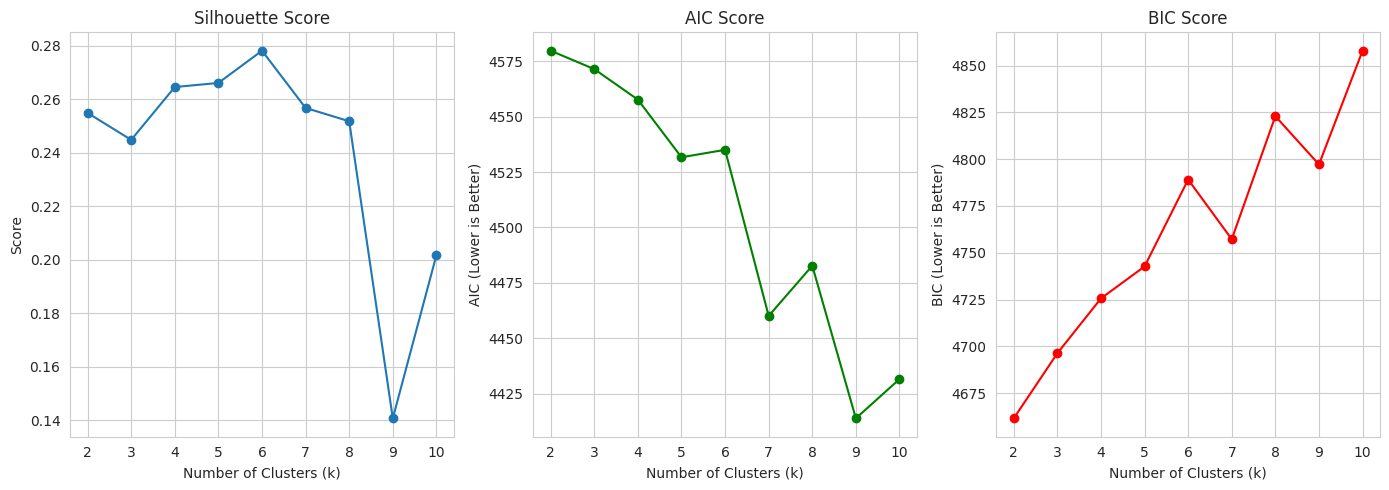

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Score")

plt.subplot(1, 3, 2)
plt.plot(k_values, aic_scores, marker='o', color='green')
plt.title("AIC Score")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("AIC (Lower is Better)")

plt.subplot(1, 3, 3)
plt.plot(k_values, bic_scores, marker='o', color='red')
plt.title("BIC Score")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("BIC (Lower is Better)")

plt.tight_layout()
plt.show()




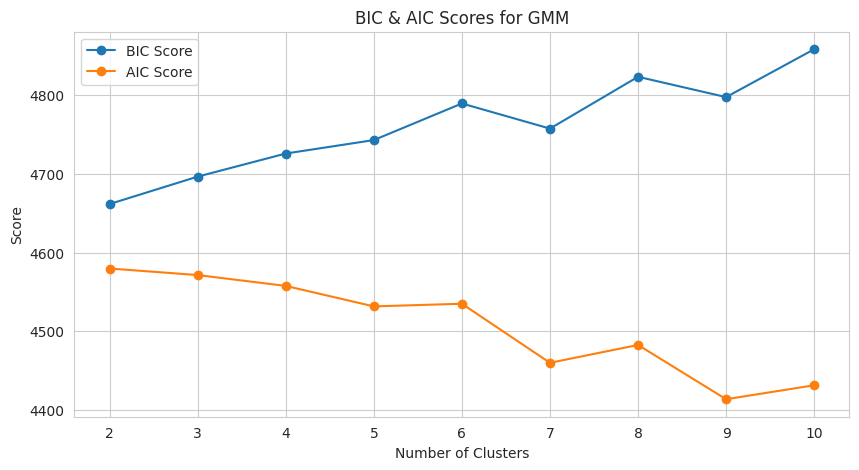

In [ ]:
# Plot BIC & AIC to choose best cluster number
plt.figure(figsize=(10, 5))
# Changed range(2, 10) to range(2, 11) for x-axis to match bic_scores length
plt.plot(range(2, 11), bic_scores, label="BIC Score", marker="o")
plt.plot(range(2, 11), aic_scores, label="AIC Score", marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.title("BIC & AIC Scores for GMM")
plt.legend()
plt.show()

In [ ]:
# Choose optimal clusters (based on lowest BIC)
optimal_clusters = np.argmin(bic_scores) + 6
print(f"Optimal number of clusters (BIC-based): {optimal_clusters}")

Optimal number of clusters (BIC-based): 6


In [ ]:
# Fit GMM with optimal clusters
gmm = GaussianMixture(n_components=optimal_clusters, covariance_type='full', random_state=42)
df["Cluster_gmm"] = gmm.fit_predict(X)

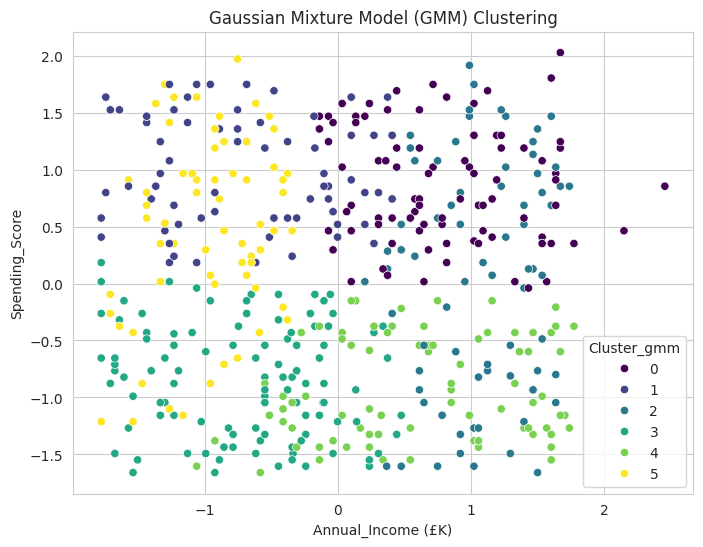

In [ ]:
# Visualization of Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Annual_Income (£K)"], y=df["Spending_Score"], hue=df["Cluster_gmm"], palette="viridis")
plt.title("Gaussian Mixture Model (GMM) Clustering")
plt.show()


In [ ]:
# Silhouette score evaluation
gmm_silhouette = silhouette_score(X, df["Cluster_gmm"])
print(f"Silhouette Score for GMM: {gmm_silhouette:.4f}")

Silhouette Score for GMM: 0.2781


In [ ]:
# Compute Davies-Bouldin Score for different cluster numbers
dbi_scores = []
cluster_range = range(2, 10)

for k in cluster_range:
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    gmm.fit(X)
    labels = gmm.predict(X)

    dbi = davies_bouldin_score(X, labels)
    dbi_scores.append(dbi)

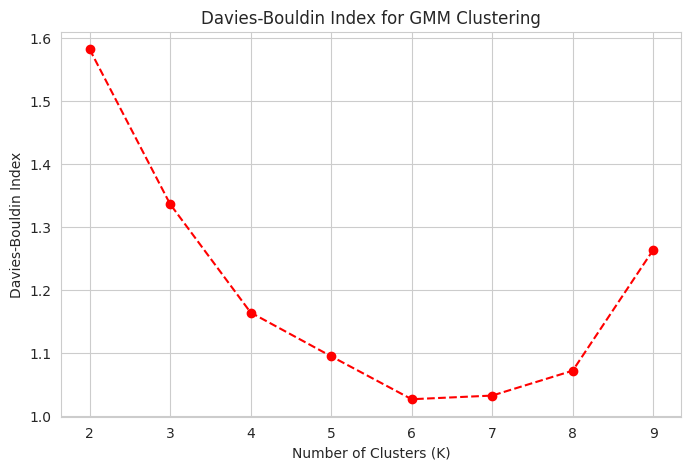

In [ ]:
# Plot DBI Score
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, dbi_scores, marker="o", linestyle="dashed", color="red")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Davies-Bouldin Index")
plt.title("Davies-Bouldin Index for GMM Clustering")
plt.show()

In [ ]:
# Find optimal clusters (lowest DBI)
optimal_clusters = cluster_range[np.argmin(dbi_scores)]
print(f"Optimal number of clusters based on DBI: {optimal_clusters}")

Optimal number of clusters based on DBI: 6


In [ ]:

# Move 'Cluster_k' to the last column
cols = list(df.columns)
cols.remove('Cluster_k')
df = df[cols + ['Cluster_k']]


In [ ]:
df

Age  Annual_Income (£K)  Spending_Score  Gender_Female  Gender_Male  \
0   -1.320898           -0.240995       -0.988880          False         True   
1    0.684590           -0.343472        0.239375          False         True   
2   -0.031656           -1.299924       -1.044709           True        False   
3   -1.607396            0.783774        0.574354           True        False   
4   -0.891151           -0.582585        0.518524           True        False   
..        ...                 ...             ...            ...          ...   
543  0.197543            0.373866       -0.653901           True        False   
544 -1.034400           -0.650903        0.183545           True        False   
545  0.326467            1.022887       -1.603007          False         True   
546 -0.389779            0.134753        1.411800          False         True   
547  0.612965           -1.436560        1.467630          False         True   

     Age_original  Annual_Income (£K)_original  Spending_Score_original  \
0            24.0                         62.0                     13.0   
1            52.0                         59.0                     35.0   
2            42.0                         31.0                     12.0   
3            20.0                         92.0                     41.0   
4            30.0                         52.0                     40.0   
..            ...                          ...                      ...   
543          45.2                         80.0                     19.0   
544          28.0                         50.0                     34.0   
545          47.0                         99.0                      2.0   
546          37.0                         73.0                     56.0   
547          51.0                         27.0                     57.0   

     Cluster_h  Cluster_gmm  Cluster_k  
0            2            4          4  
1            3            1          1  
2            2            3          3  
3            1            0          0  
4            1            5          5  
..         ...          ...        ...  
543          2            3          4  
544          1            5          5  
545          2            2          4  
546          1            0          0  
547          1            1          1  

[548 rows x 11 columns]


GMM Cluster 0:
         Age  Annual_Income (£K)  Spending_Score
0  30.727273           80.065455       46.545455
1  30.421053          108.973684       46.036842


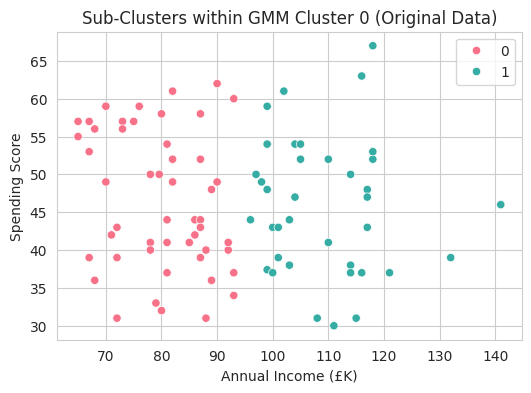


GMM Cluster 1:
         Age  Annual_Income (£K)  Spending_Score
0  53.491892           66.129730       46.081081
1  50.765854           33.634146       50.097561


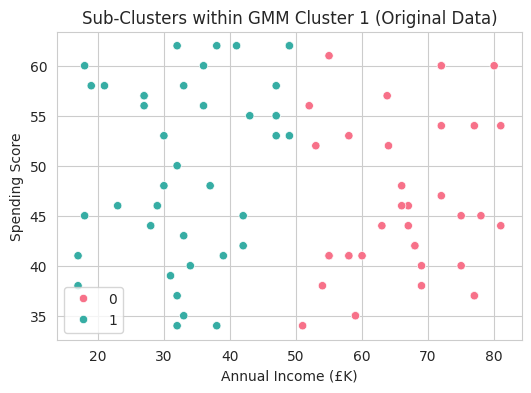


GMM Cluster 2:
         Age  Annual_Income (£K)  Spending_Score
0  54.653061          100.734694       44.261224
1  57.800000           99.508571       12.474286


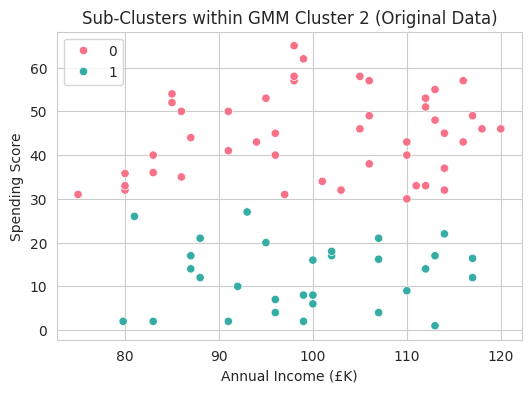


GMM Cluster 3:
         Age  Annual_Income (£K)  Spending_Score
0  51.701961           28.392157       15.917647
1  53.142500           60.270000       15.362500


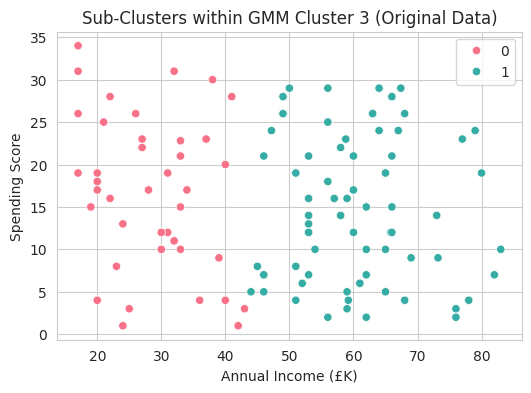


GMM Cluster 4:
         Age  Annual_Income (£K)  Spending_Score
0  32.311111          106.644444       15.600000
1  28.855814           68.920930       12.604651


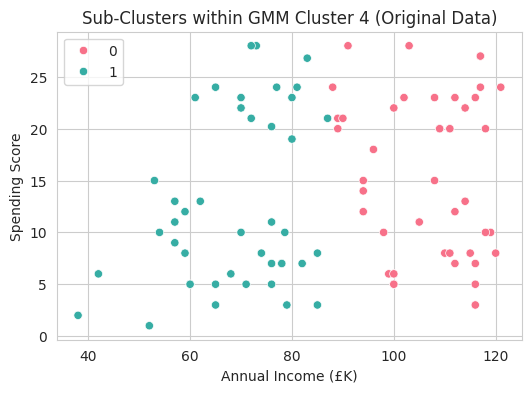


GMM Cluster 5:
         Age  Annual_Income (£K)  Spending_Score
0  29.208696           47.347826       45.934783
1  25.857143           30.100000       27.100000


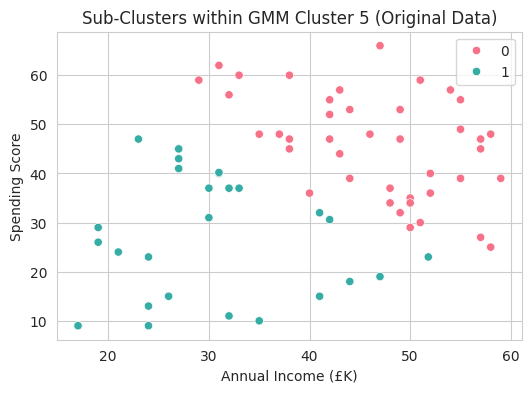

In [ ]:
# Group data by the GMM clusters
grouped_gmm = df.groupby('Cluster_gmm')

# Define a colormap for better visualization
colormap = sns.color_palette("husl", 2)  # Adjust number of colors for sub-clusters

# Iterate through each GMM cluster
for cluster_label, cluster_data in grouped_gmm:
    print(f"\nGMM Cluster {cluster_label}:")

    # Use the original dataset for sub-clustering
    X_cluster = df0.iloc[cluster_data.index][['Age', 'Annual_Income (£K)', 'Spending_Score']]

    # Apply K-means to the current GMM cluster using original data
    kmeans_sub = KMeans(n_clusters=2, random_state=42)  # Example: Divide into 2 sub-clusters
    sub_cluster_labels = kmeans_sub.fit_predict(X_cluster)

    # Add sub-cluster labels to the original DataFrame 'df0'
    df0.loc[cluster_data.index, 'Sub_Cluster_k'] = sub_cluster_labels

    # Analyze the sub-clusters
    print(X_cluster.groupby(sub_cluster_labels).mean())

    # Visualization of sub-clusters within the GMM cluster
    plt.figure(figsize=(6, 4))
    sns.scatterplot(
        x=X_cluster['Annual_Income (£K)'],
        y=X_cluster['Spending_Score'],
        hue=sub_cluster_labels,
        palette=colormap,
        legend="full"
    )
    plt.title(f"Sub-Clusters within GMM Cluster {cluster_label} (Original Data)")
    plt.xlabel("Annual Income (£K)")
    plt.ylabel("Spending Score")
    plt.show()


In [ ]:

# Group data by the GMM clusters and display relevant columns
grouped_gmm = df.groupby('Cluster_gmm')

# Iterate through each GMM cluster
for cluster_label, cluster_data in grouped_gmm:
    print(f"\nGMM Cluster {cluster_label}:")
    # Display 'Age_original', 'Annual_Income (£K)_original', 'Spending_Score_original'
    print(cluster_data[['Age_original', 'Annual_Income (£K)_original', 'Spending_Score_original']])



GMM Cluster 0:
     Age_original  Annual_Income (£K)_original  Spending_Score_original
3            20.0                         92.0                     41.0
9            32.0                         85.0                     41.0
19           19.0                        118.0                     52.0
31           18.0                         65.0                     57.0
38           26.0                        100.0                     43.0
..            ...                          ...                      ...
527          29.0                         99.0                     54.0
530          36.0                         82.0                     49.0
534          37.0                         79.6                     50.0
539          31.0                        114.0                     37.0
546          37.0                         73.0                     56.0

[93 rows x 3 columns]

GMM Cluster 1:
     Age_original  Annual_Income (£K)_original  Spending_Score_original
1        

### visulization k_means

<ipython-input-286-19f1666e753e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



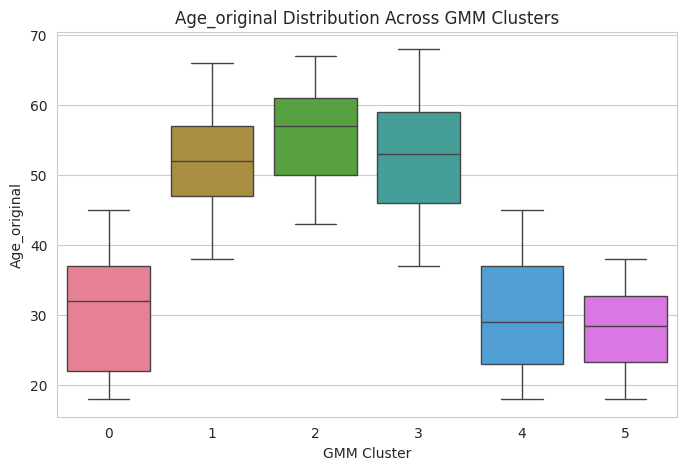

<ipython-input-286-19f1666e753e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



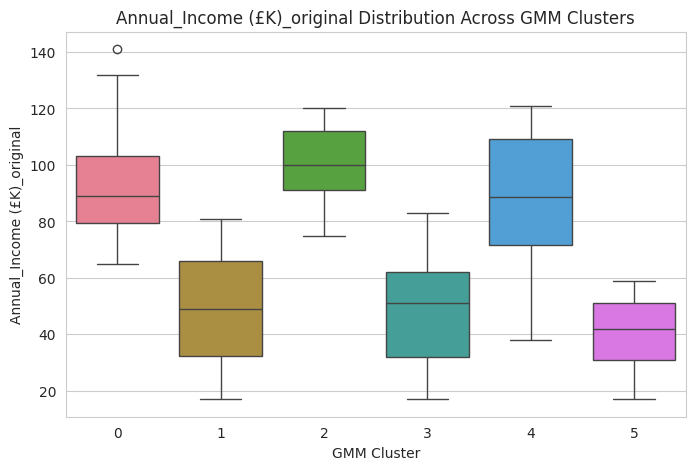

<ipython-input-286-19f1666e753e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



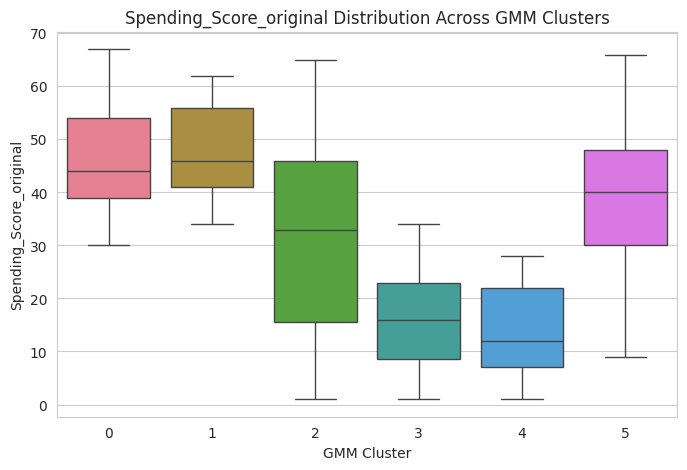

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['Age_original', 'Annual_Income (£K)_original', 'Spending_Score_original']

for feature in features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df['Cluster_gmm'], y=df[feature], palette="husl")
    plt.title(f"{feature} Distribution Across GMM Clusters")
    plt.xlabel("GMM Cluster")
    plt.ylabel(feature)
    plt.show()


<ipython-input-287-84a099211fb6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



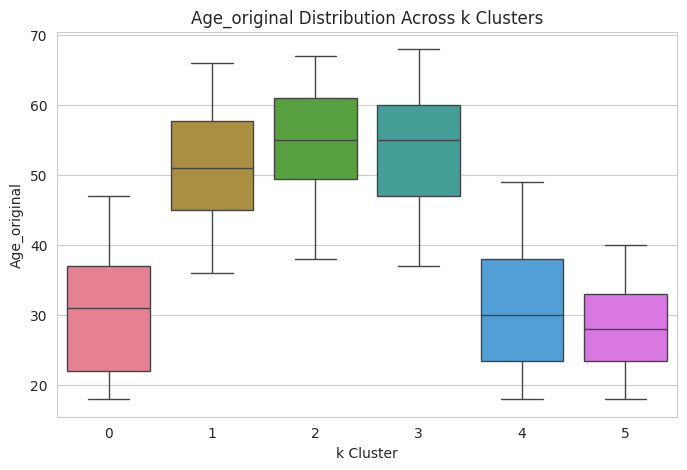

<ipython-input-287-84a099211fb6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



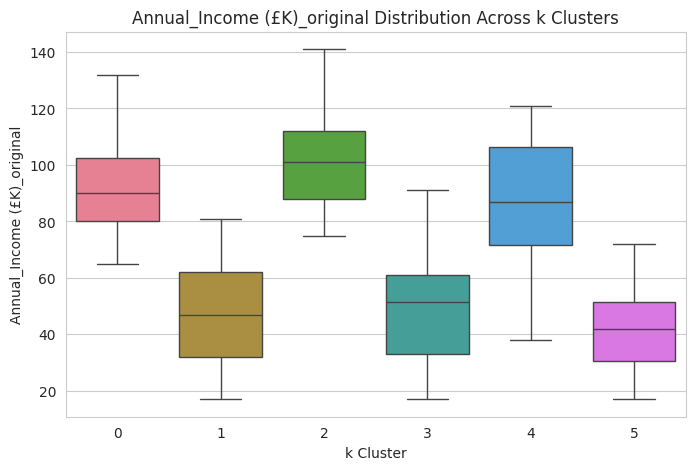

<ipython-input-287-84a099211fb6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



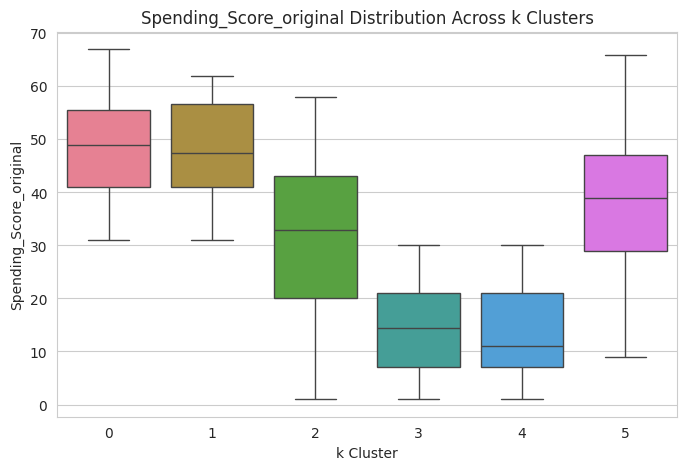

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['Age_original', 'Annual_Income (£K)_original', 'Spending_Score_original']

for feature in features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df['Cluster_k'], y=df[feature], palette="husl")
    plt.title(f"{feature} Distribution Across k Clusters")
    plt.xlabel("k Cluster")
    plt.ylabel(feature)
    plt.show()

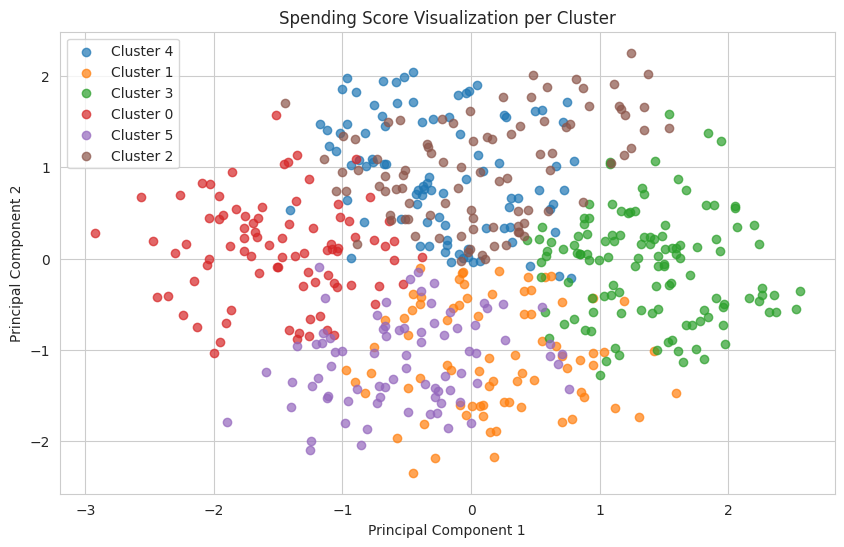

In [ ]:
# prompt: visualise each cluster with spending score

import matplotlib.pyplot as plt

# Assuming 'df' and 'df_pca' are defined from the previous code

plt.figure(figsize=(10, 6))

for cluster_label in df['Cluster_k'].unique():
    cluster_data = df[df['Cluster_k'] == cluster_label]
    plt.scatter(df_pca[df['Cluster_k'] == cluster_label, 0],
                df_pca[df['Cluster_k'] == cluster_label, 1],
                label=f'Cluster {cluster_label}', alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Spending Score Visualization per Cluster')
plt.legend()
plt.grid(True)
plt.show()


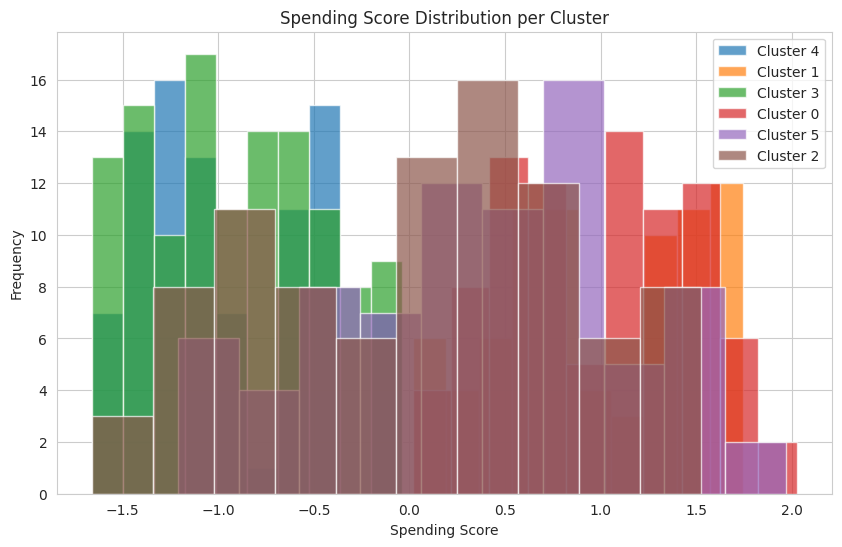

In [ ]:
# prompt: visualise clustering with their spending score in histgram

import matplotlib.pyplot as plt

# Assuming 'df' and 'df_pca' are defined from the previous code and 'df' contains 'Cluster_k' and 'Spending_Score'

plt.figure(figsize=(10, 6))

for cluster_label in df['Cluster_k'].unique():
    cluster_data = df[df['Cluster_k'] == cluster_label]
    plt.hist(cluster_data['Spending_Score'], alpha=0.7, label=f'Cluster {cluster_label}')

plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.title('Spending Score Distribution per Cluster')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-290-7c27664e3f5e>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.


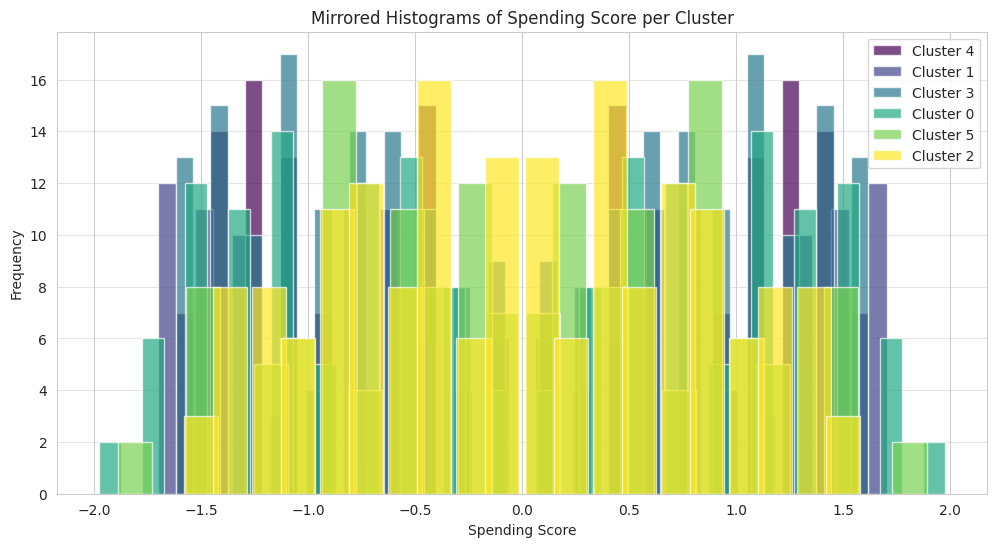

In [ ]:
plt.figure(figsize=(12, 6))

colors = plt.cm.get_cmap('viridis', len(df['Cluster_k'].unique()))  # Get a colormap with enough colors

for i, cluster_label in enumerate(df['Cluster_k'].unique()):
    cluster_data = df[df['Cluster_k'] == cluster_label]

    # Calculate histogram data for the current cluster
    hist_values, bin_edges = np.histogram(cluster_data['Spending_Score'], bins=10)  # Adjust bins as needed

    # Plotting mirrored histograms
    bar_width = (bin_edges[1] - bin_edges[0]) / 2  # Adjust bar width if necessary

    # Get color for the current cluster
    color = colors(i)

    # Plot for the first side of the axis
    plt.bar(bin_edges[:-1] + bar_width, hist_values, width=bar_width, label=f'Cluster {cluster_label}', alpha=0.7, color=color)

    # Plot for the second side of the axis using the same color
    plt.bar(-bin_edges[:-1] - bar_width, hist_values, width=bar_width, alpha=0.7, color=color)


plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.title('Mirrored Histograms of Spending Score per Cluster')
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

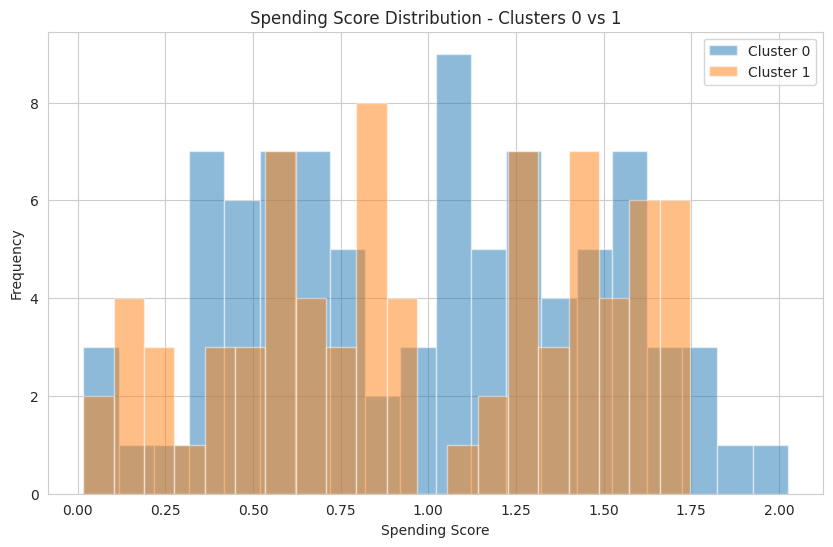

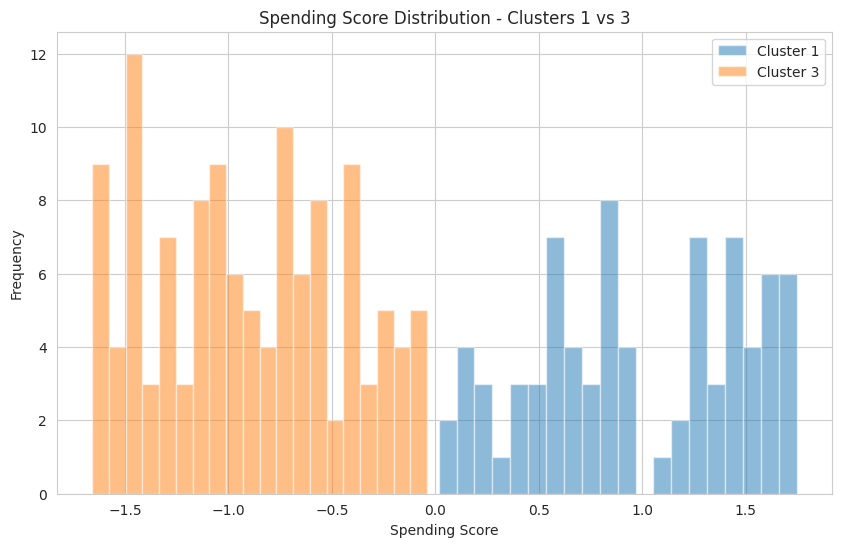

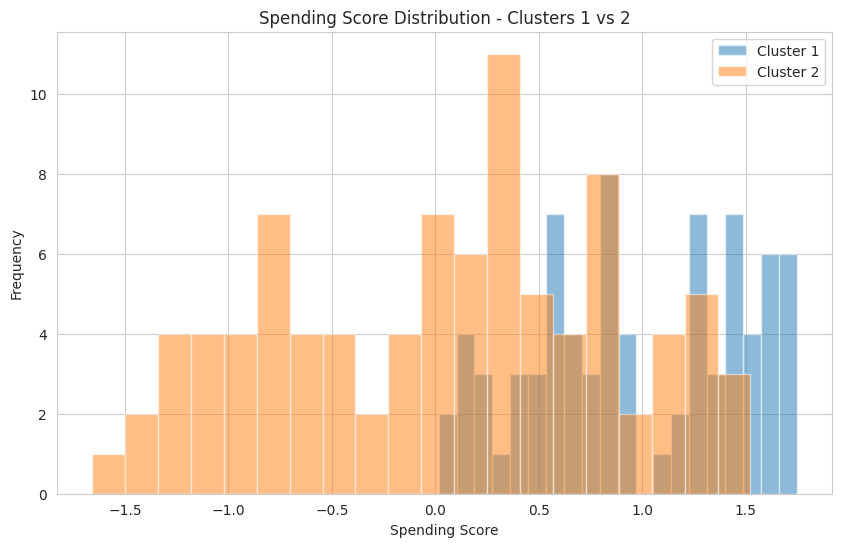

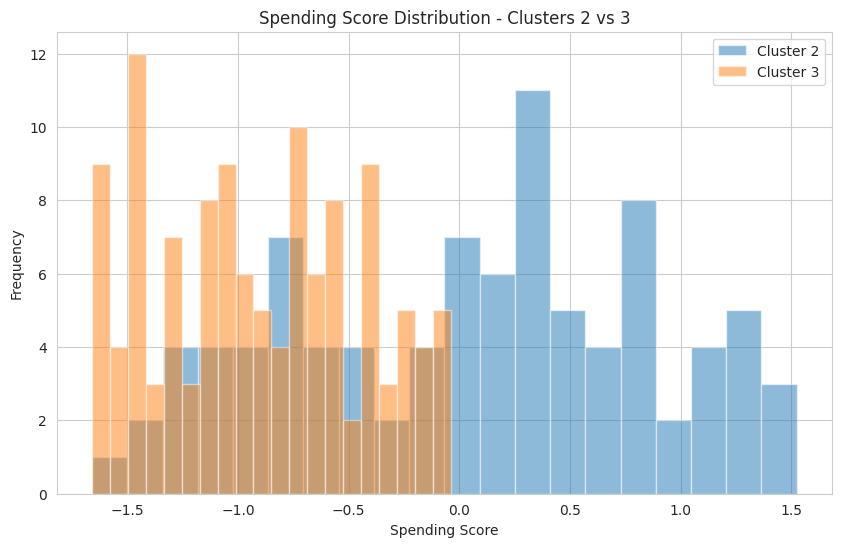

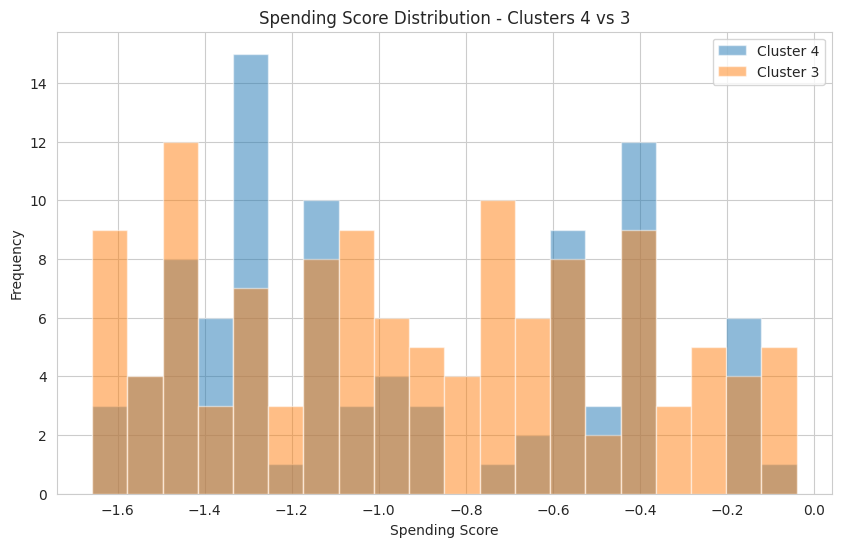

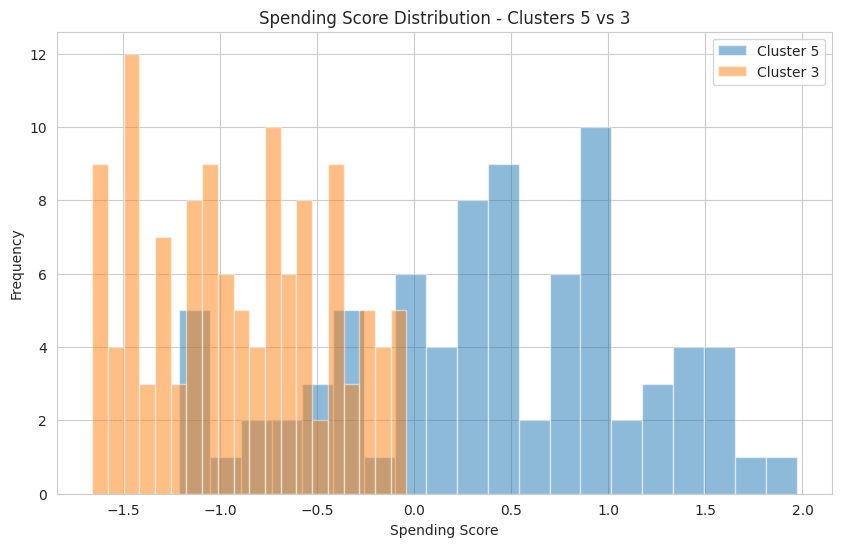

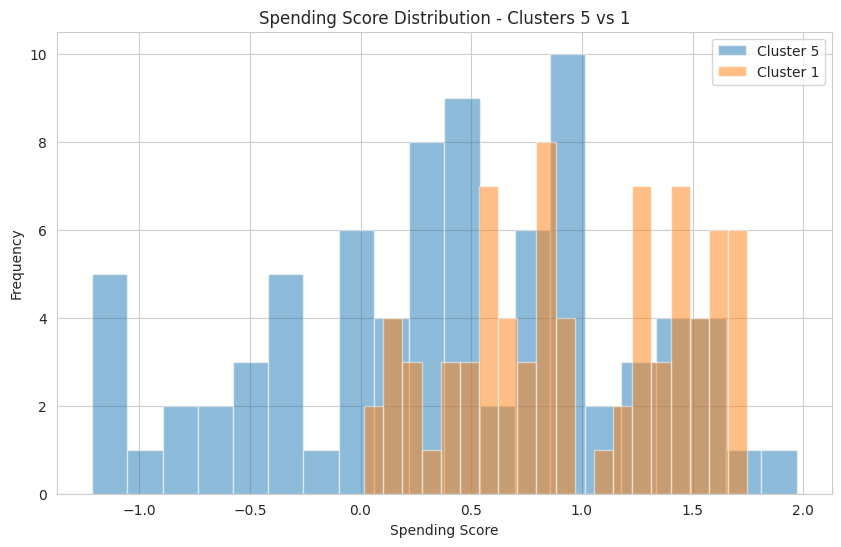

In [ ]:
# prompt: visualise clusters with their spending score with histogram with butterfly for comparing  with two clusters one time

import matplotlib.pyplot as plt

# Assuming 'df' and 'df_pca' are defined from the previous code and contain 'Cluster_k' and 'Spending_Score' columns.

def visualize_clusters(cluster1, cluster2):
    plt.figure(figsize=(10, 6))

    for cluster_label in [cluster1, cluster2]:
        cluster_data = df[df['Cluster_k'] == cluster_label]
        plt.hist(cluster_data['Spending_Score'], alpha=0.5, label=f'Cluster {cluster_label}', bins=20)

    plt.xlabel('Spending Score')
    plt.ylabel('Frequency')
    plt.title(f'Spending Score Distribution - Clusters {cluster1} vs {cluster2}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage: Compare clusters 0 and 1
visualize_clusters(0, 1)

# Example usage: Compare clusters 1 and 3
visualize_clusters(1,3)

# Example usage: Compare clusters 1 and 2
visualize_clusters(1,2)

# Example usage: Compare clusters 2 and 3
visualize_clusters(2,3)

# Example usage: Compare clusters 4 and 3
visualize_clusters(4,3)

# Example usage: Compare clusters 5 and 3
visualize_clusters(5,3)

# Example usage: Compare clusters 5 and 1
visualize_clusters(5,1)


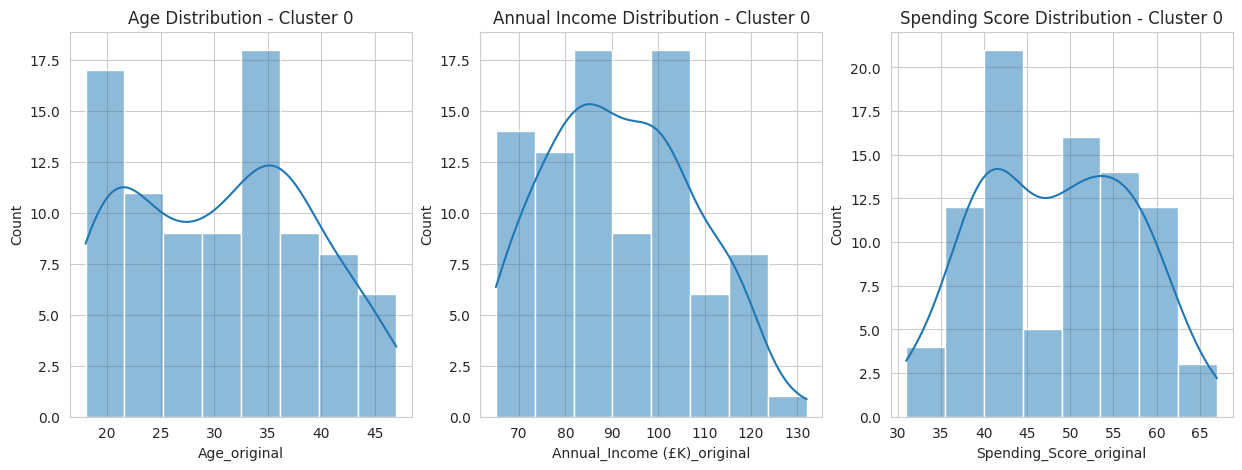

Cluster 0 Statistics:
       Age_original  Annual_Income (£K)_original  Spending_Score_original
count     87.000000                    87.000000                87.000000
mean      30.632184                    91.708046                48.303448
std        8.451166                    15.722649                 8.747989
min       18.000000                    65.000000                31.000000
25%       22.000000                    80.000000                41.000000
50%       31.000000                    90.000000                49.000000
75%       37.000000                   102.500000                55.500000
max       47.000000                   132.000000                67.000000
--------------------


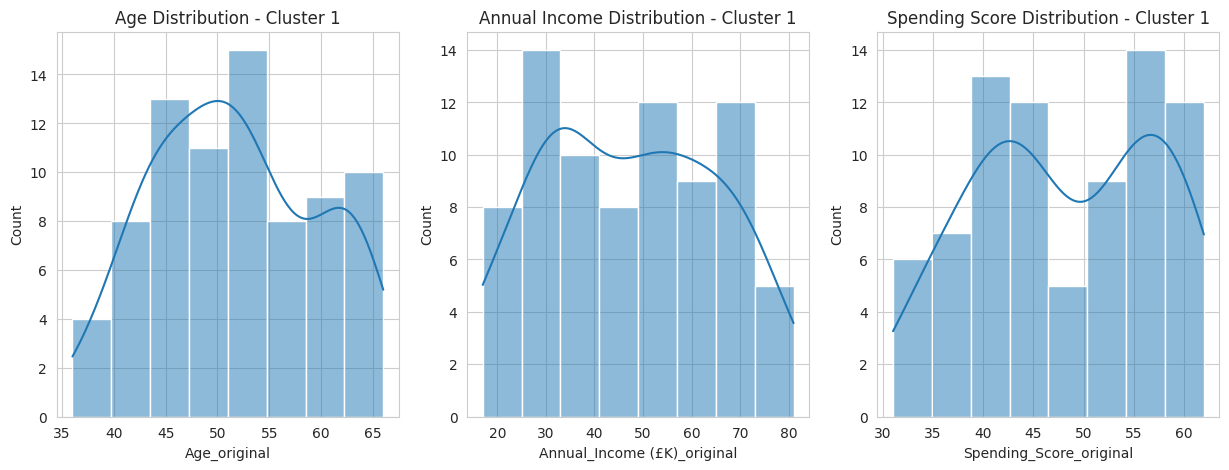

Cluster 1 Statistics:
       Age_original  Annual_Income (£K)_original  Spending_Score_original
count     78.000000                    78.000000                78.000000
mean      51.700000                    46.971795                48.294872
std        7.840272                    18.069555                 9.092753
min       36.000000                    17.000000                31.000000
25%       45.000000                    32.000000                41.000000
50%       51.000000                    47.000000                47.500000
75%       57.750000                    62.250000                56.750000
max       66.000000                    81.000000                62.000000
--------------------


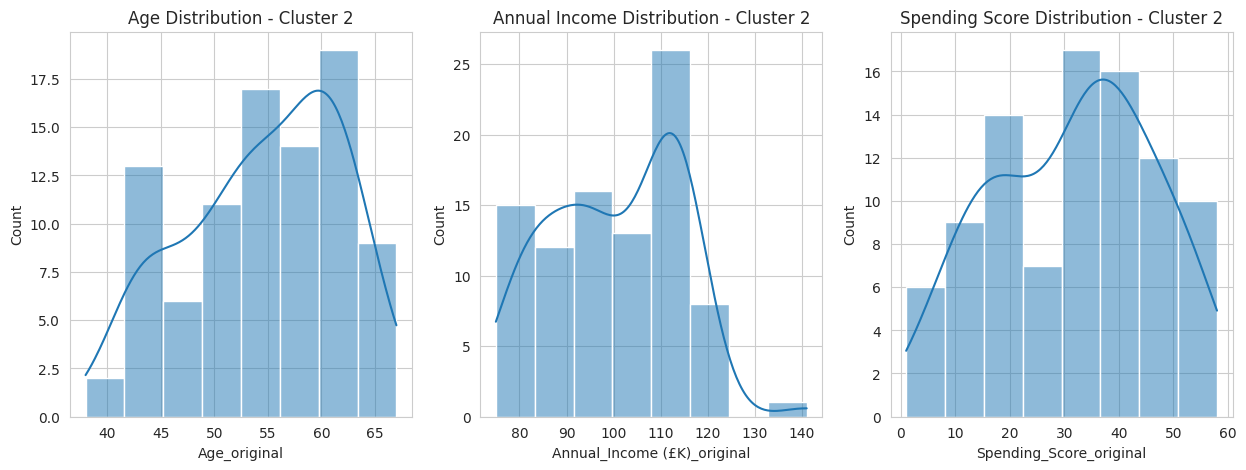

Cluster 2 Statistics:
       Age_original  Annual_Income (£K)_original  Spending_Score_original
count     91.000000                    91.000000                91.000000
mean      54.606593                   100.230769                31.661538
std        7.162833                    13.918874                14.676533
min       38.000000                    75.000000                 1.000000
25%       49.500000                    88.000000                20.000000
50%       55.000000                   101.000000                33.000000
75%       61.000000                   112.000000                43.000000
max       67.000000                   141.000000                58.000000
--------------------


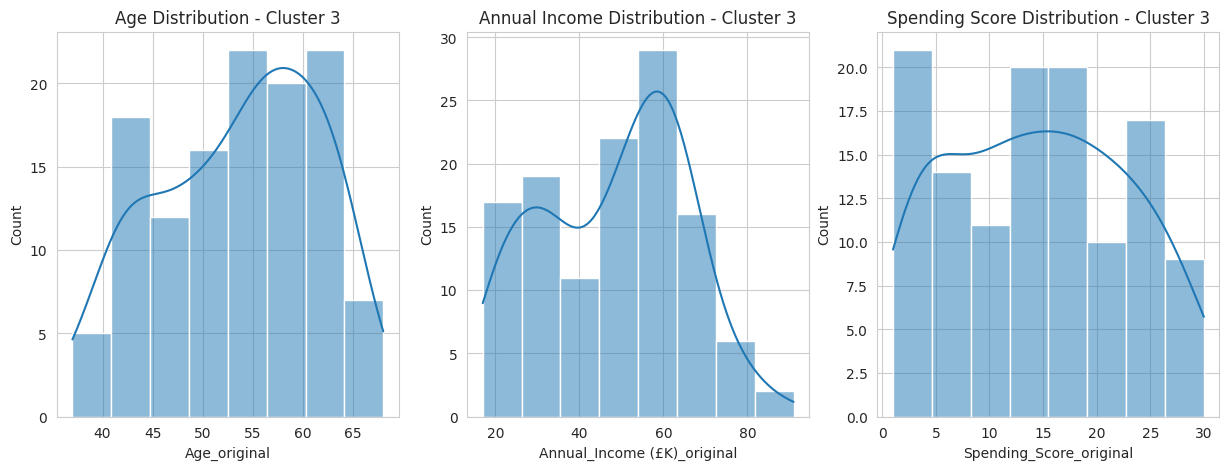

Cluster 3 Statistics:
       Age_original  Annual_Income (£K)_original  Spending_Score_original
count    122.000000                   122.000000               122.000000
mean      53.504918                    48.208197                14.424590
std        7.976213                    17.215914                 8.282435
min       37.000000                    17.000000                 1.000000
25%       47.000000                    33.000000                 7.000000
50%       55.000000                    51.500000                14.500000
75%       60.000000                    61.000000                21.000000
max       68.000000                    91.000000                30.000000
--------------------


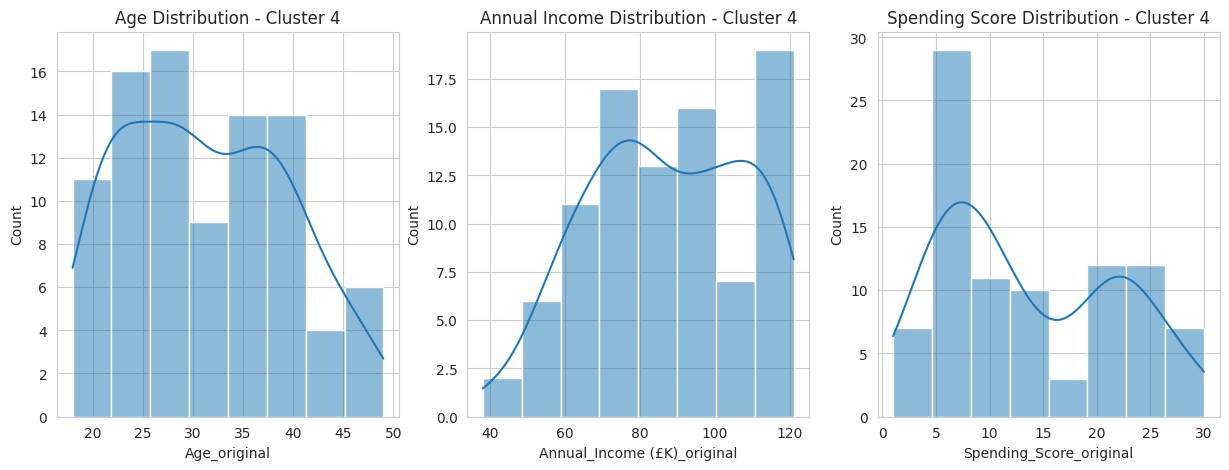

Cluster 4 Statistics:
       Age_original  Annual_Income (£K)_original  Spending_Score_original
count     91.000000                    91.000000                91.000000
mean      31.287912                    87.336264                13.595604
std        8.133946                    21.022018                 8.123052
min       18.000000                    38.000000                 1.000000
25%       23.500000                    71.500000                 7.000000
50%       30.000000                    87.000000                11.000000
75%       38.000000                   106.500000                21.000000
max       49.000000                   121.000000                30.000000
--------------------


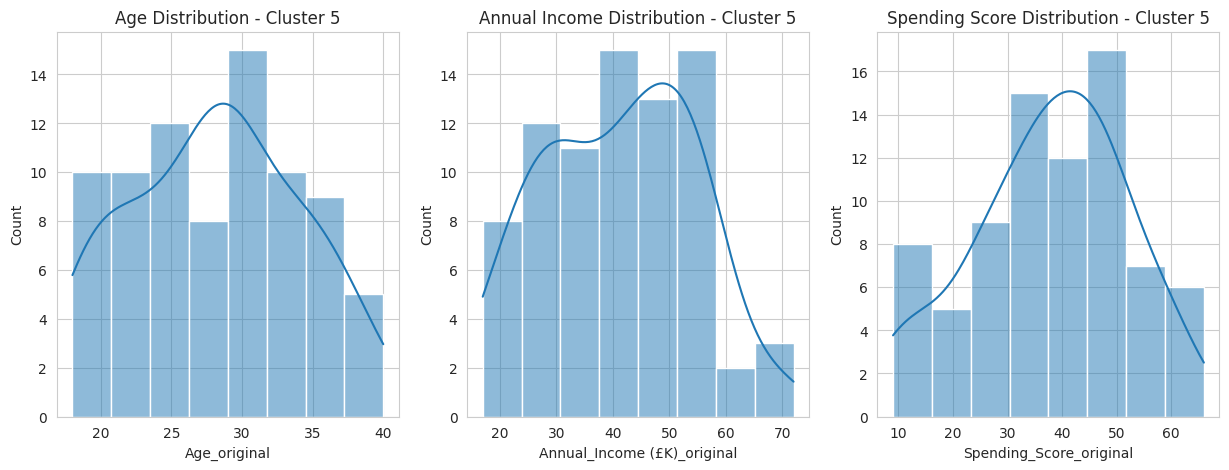

Cluster 5 Statistics:
       Age_original  Annual_Income (£K)_original  Spending_Score_original
count     79.000000                    79.000000                79.000000
mean      28.058228                    41.136709                37.756962
std        5.983409                    13.415053                13.948134
min       18.000000                    17.000000                 9.000000
25%       23.500000                    30.500000                29.000000
50%       28.000000                    42.000000                39.000000
75%       33.000000                    51.400000                47.000000
max       40.000000                    72.000000                66.000000
--------------------


In [ ]:
# prompt: analysis for each cluster plot with Age_original,Annual_Income (£K)_original, Spending_Score_original

# Assuming 'df' is your DataFrame with 'Cluster_k', 'Age_original', 'Annual_Income (£K)_original', and 'Spending_Score_original' columns.

import matplotlib.pyplot as plt
import seaborn as sns

# Group data by cluster
grouped = df.groupby('Cluster_k')

# Iterate through each cluster and create analysis plots
for cluster_label, cluster_data in grouped:
    plt.figure(figsize=(15, 5))  # Adjust figure size as needed

    # Plot Age distribution
    plt.subplot(1, 3, 1)
    sns.histplot(cluster_data['Age_original'], kde=True)
    plt.title(f'Age Distribution - Cluster {cluster_label}')

    # Plot Annual Income distribution
    plt.subplot(1, 3, 2)
    sns.histplot(cluster_data['Annual_Income (£K)_original'], kde=True)
    plt.title(f'Annual Income Distribution - Cluster {cluster_label}')

    # Plot Spending Score distribution
    plt.subplot(1, 3, 3)
    sns.histplot(cluster_data['Spending_Score_original'], kde=True)
    plt.title(f'Spending Score Distribution - Cluster {cluster_label}')

    plt.show() # Show the plot for the current cluster

    # Additional analysis (example: descriptive statistics)
    print(f"Cluster {cluster_label} Statistics:")
    print(cluster_data[['Age_original', 'Annual_Income (£K)_original', 'Spending_Score_original']].describe())
    print("-" * 20)

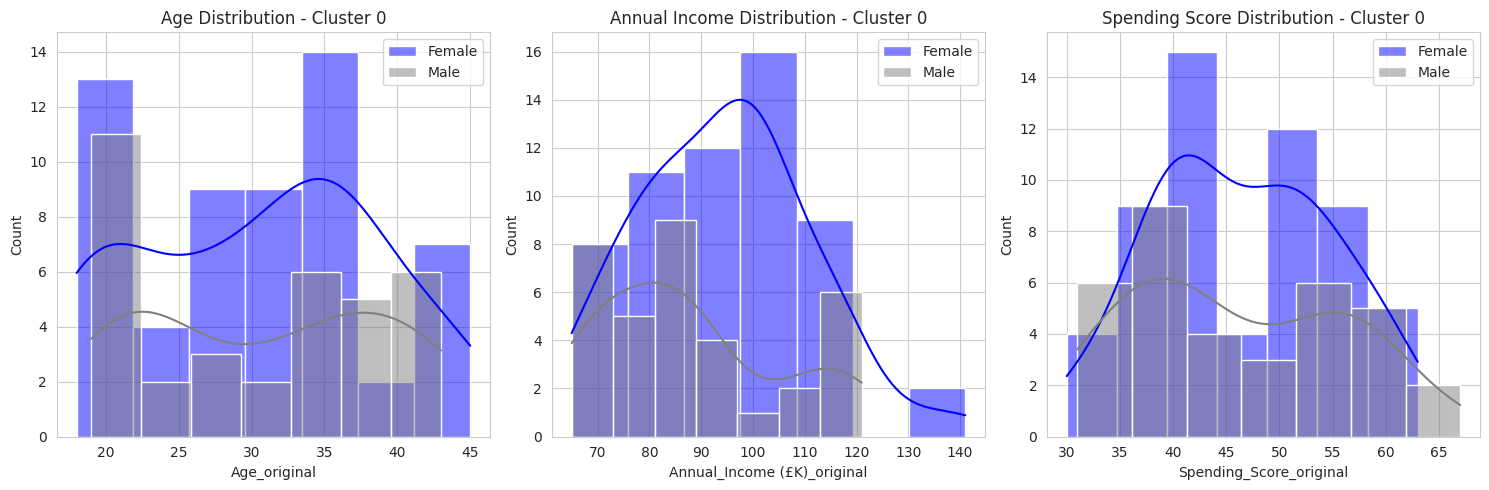

Cluster 0 Statistics:
       Age_original  Annual_Income (£K)_original  Spending_Score_original
count     93.000000                    93.000000                93.000000
mean      30.602151                    91.877419                46.337634
std        8.233257                    17.017690                 8.981477
min       18.000000                    65.000000                30.000000
25%       22.000000                    79.600000                39.000000
50%       32.000000                    89.000000                44.000000
75%       37.000000                   103.000000                54.000000
max       45.000000                   141.000000                67.000000
--------------------


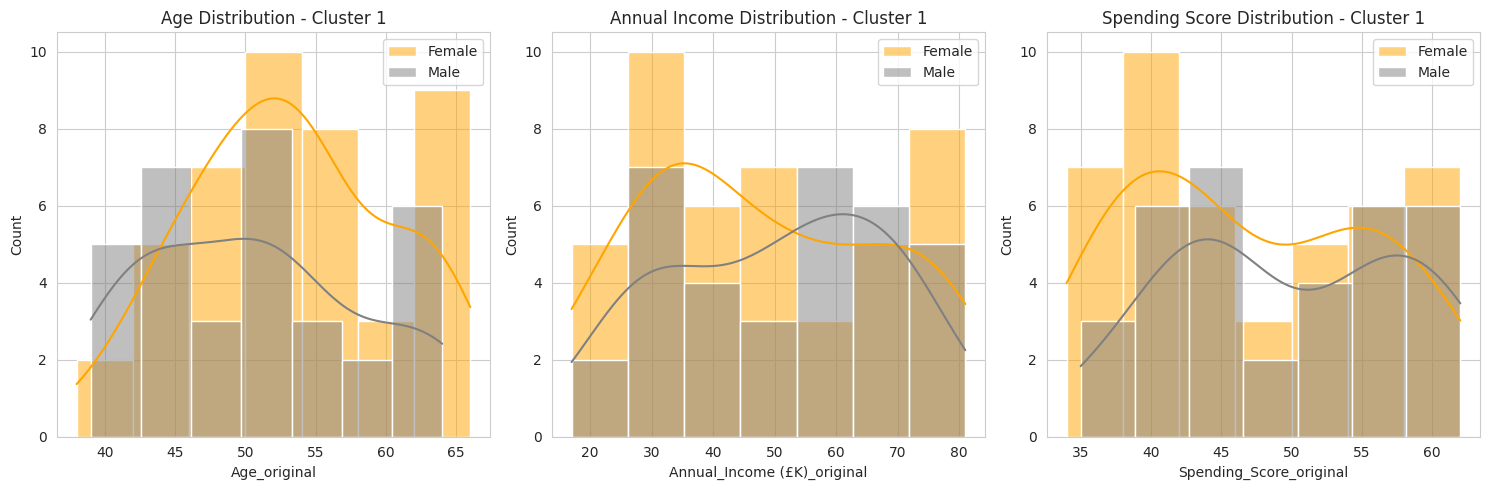

Cluster 1 Statistics:
       Age_original  Annual_Income (£K)_original  Spending_Score_original
count     78.000000                    78.000000                78.000000
mean      52.058974                    49.048718                48.192308
std        7.465878                    18.739449                 8.619003
min       38.000000                    17.000000                34.000000
25%       47.000000                    32.250000                41.000000
50%       52.000000                    49.000000                46.000000
75%       57.000000                    66.000000                56.000000
max       66.000000                    81.000000                62.000000
--------------------


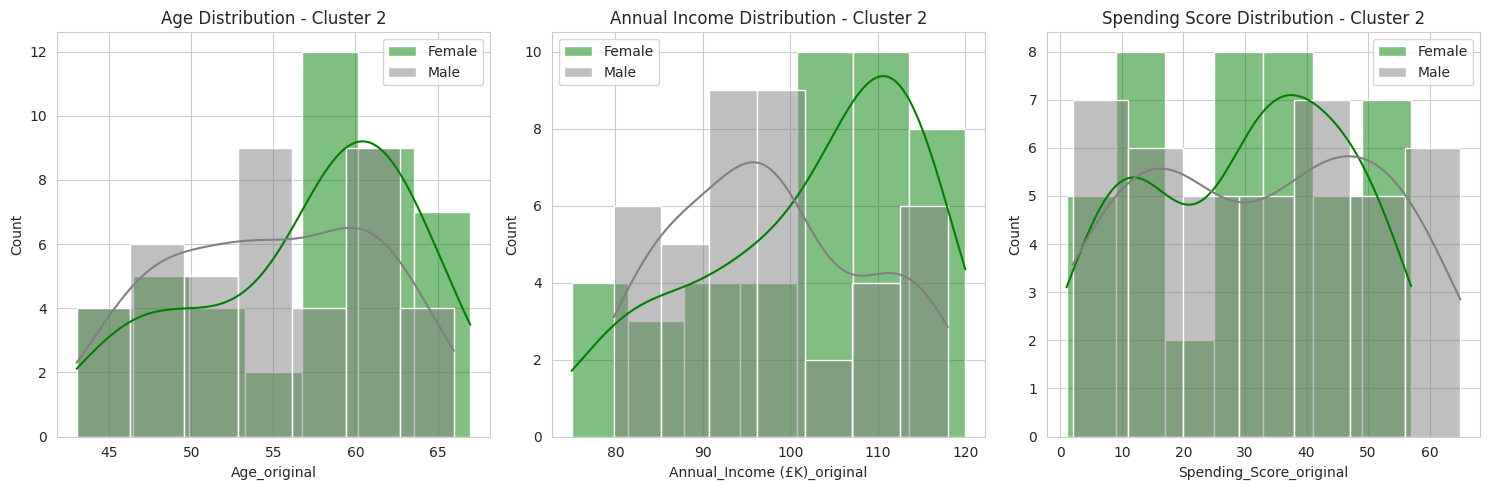

Cluster 2 Statistics:
       Age_original  Annual_Income (£K)_original  Spending_Score_original
count     84.000000                    84.000000                84.000000
mean      55.964286                   100.223810                31.016667
std        6.527876                    11.836656                17.930662
min       43.000000                    75.000000                 1.000000
25%       50.000000                    91.000000                15.500000
50%       57.000000                   100.000000                33.000000
75%       61.000000                   112.000000                46.000000
max       67.000000                   120.000000                65.000000
--------------------


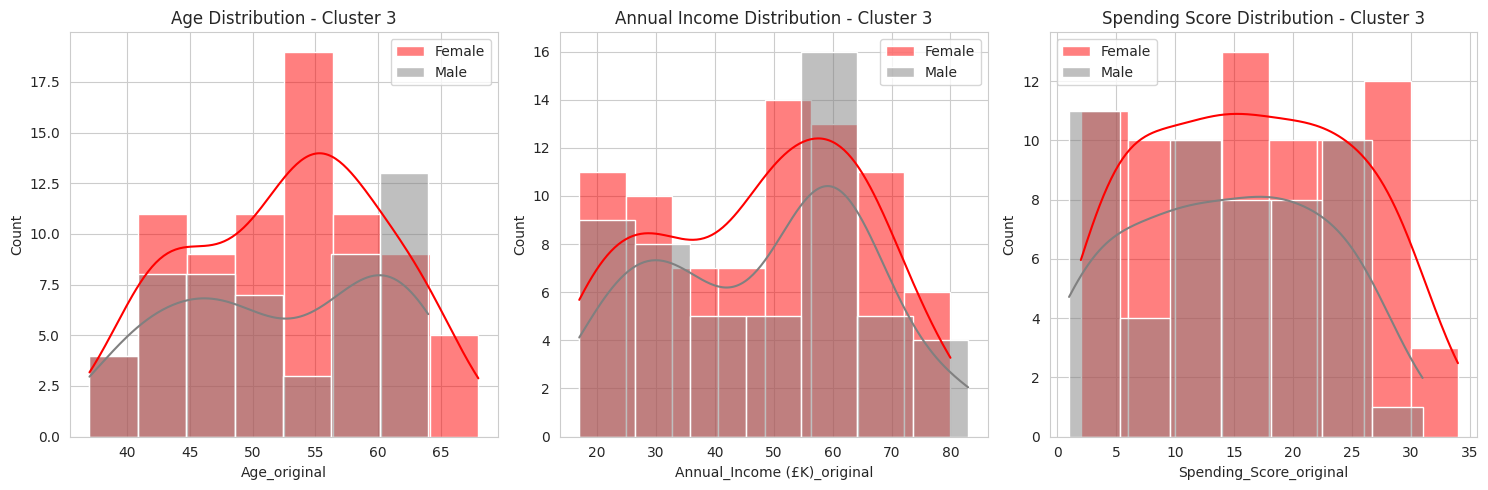

Cluster 3 Statistics:
       Age_original  Annual_Income (£K)_original  Spending_Score_original
count    131.000000                   131.000000               131.000000
mean      52.581679                    47.859542                15.578626
std        8.021412                    17.814941                 8.545345
min       37.000000                    17.000000                 1.000000
25%       46.000000                    32.000000                 8.500000
50%       53.000000                    51.000000                16.000000
75%       59.000000                    62.000000                23.000000
max       68.000000                    83.000000                34.000000
--------------------


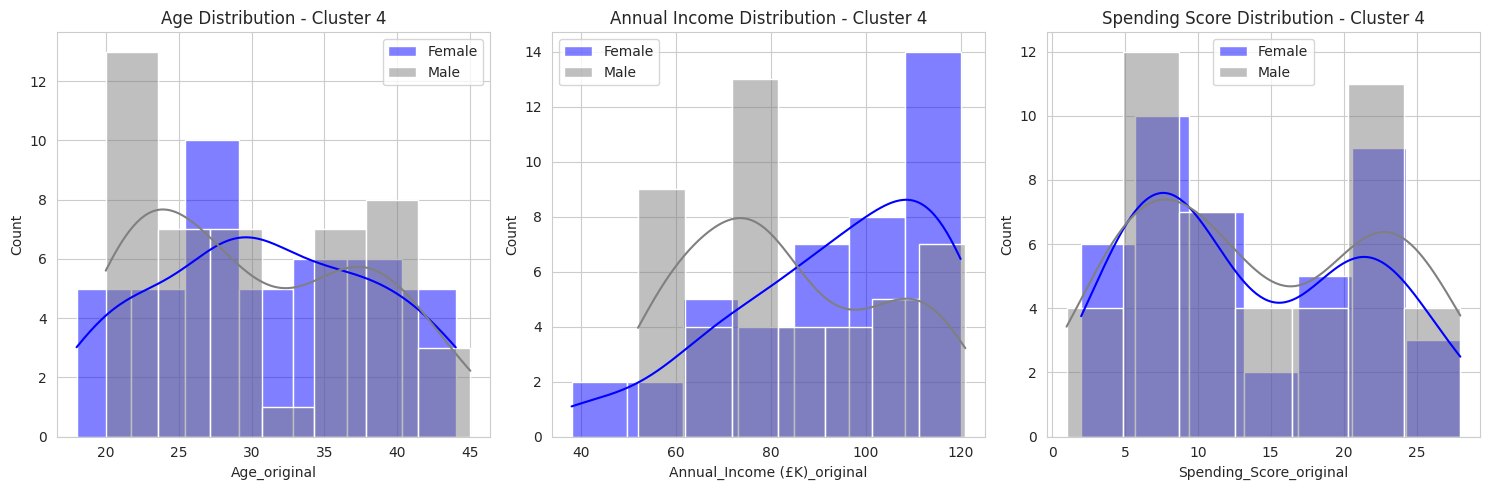

Cluster 4 Statistics:
       Age_original  Annual_Income (£K)_original  Spending_Score_original
count     88.000000                    88.000000                88.000000
mean      30.622727                    88.211364                14.136364
std        7.620265                    21.778516                 8.031292
min       18.000000                    38.000000                 1.000000
25%       23.000000                    71.750000                 7.000000
50%       29.000000                    88.500000                12.000000
75%       37.000000                   109.250000                22.000000
max       45.000000                   121.000000                28.000000
--------------------


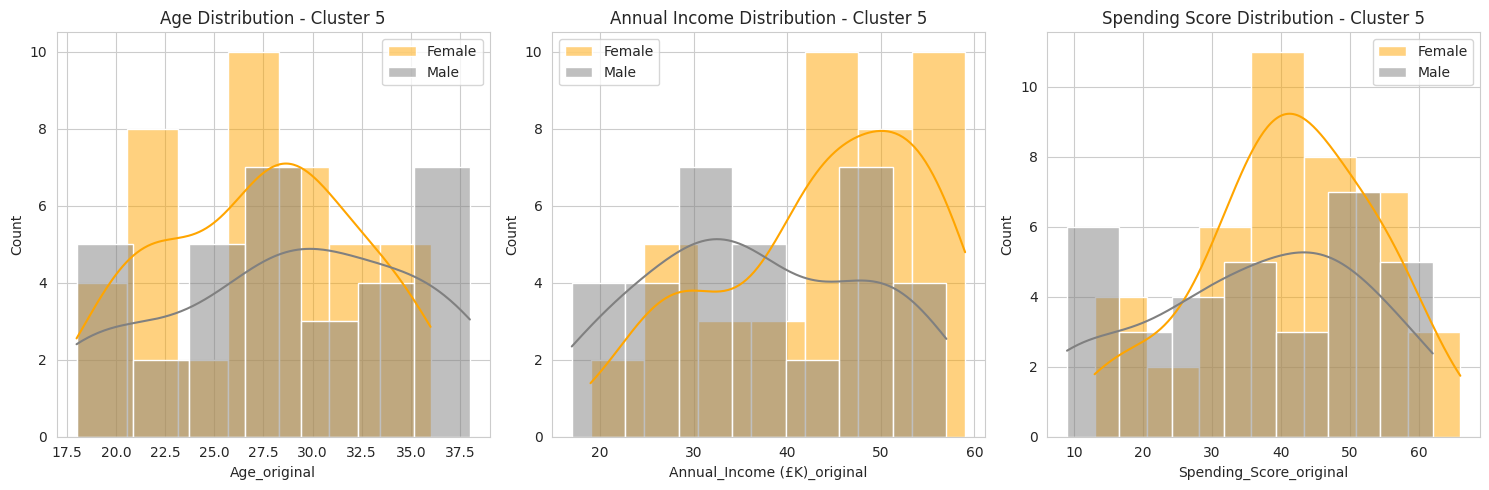

Cluster 5 Statistics:
       Age_original  Annual_Income (£K)_original  Spending_Score_original
count     74.000000                    74.000000                74.000000
mean      27.940541                    40.821622                38.808108
std        5.740386                    11.944097                14.478267
min       18.000000                    17.000000                 9.000000
25%       23.250000                    31.000000                30.150000
50%       28.500000                    42.000000                40.000000
75%       32.750000                    51.000000                48.000000
max       38.000000                    59.000000                66.000000
--------------------


In [ ]:
# Group data by cluster
grouped = df.groupby('Cluster_gmm')

# Define colors for each cluster (you can add more if you have more clusters)
cluster_colors = ['blue', 'orange', 'green', 'red']
# Iterate through each cluster and create analysis plots
for cluster_label, cluster_data in grouped:
    plt.figure(figsize=(15, 5))  # Adjust figure size as needed

    # Get the color for the current cluster using modulo operator
    color = cluster_colors[cluster_label % len(cluster_colors)]

    # Plot Age distribution, divided by Gender_Male
    plt.subplot(1, 3, 1)
    sns.histplot(cluster_data[cluster_data['Gender_Male'] == 0]['Age_original'],
                 kde=True, color=color, label='Female')
    sns.histplot(cluster_data[cluster_data['Gender_Male'] == 1]['Age_original'],
                 kde=True, color='gray', label='Male')
    plt.title(f'Age Distribution - Cluster {cluster_label}')
    plt.legend()  # Add legend to distinguish genders

    # Plot Annual Income distribution, divided by Gender_Male
    plt.subplot(1, 3, 2)
    sns.histplot(cluster_data[cluster_data['Gender_Male'] == 0]['Annual_Income (£K)_original'],
                 kde=True, color=color, label='Female')
    sns.histplot(cluster_data[cluster_data['Gender_Male'] == 1]['Annual_Income (£K)_original'],
                 kde=True, color='gray', label='Male')
    plt.title(f'Annual Income Distribution - Cluster {cluster_label}')
    plt.legend()

    # Plot Spending Score distribution, divided by Gender_Male
    plt.subplot(1, 3, 3)
    sns.histplot(cluster_data[cluster_data['Gender_Male'] == 0]['Spending_Score_original'],
                 kde=True, color=color, label='Female')
    sns.histplot(cluster_data[cluster_data['Gender_Male'] == 1]['Spending_Score_original'],
                 kde=True, color='gray', label='Male')
    plt.title(f'Spending Score Distribution - Cluster {cluster_label}')
    plt.legend()

    plt.tight_layout() # Adjust layout to prevent overlapping
    plt.show() # Show the plot for the current cluster

    # Additional analysis (example: descriptive statistics)
    print(f"Cluster {cluster_label} Statistics:")
    print(cluster_data[['Age_original', 'Annual_Income (£K)_original', 'Spending_Score_original']].describe())
    print("-" * 20)

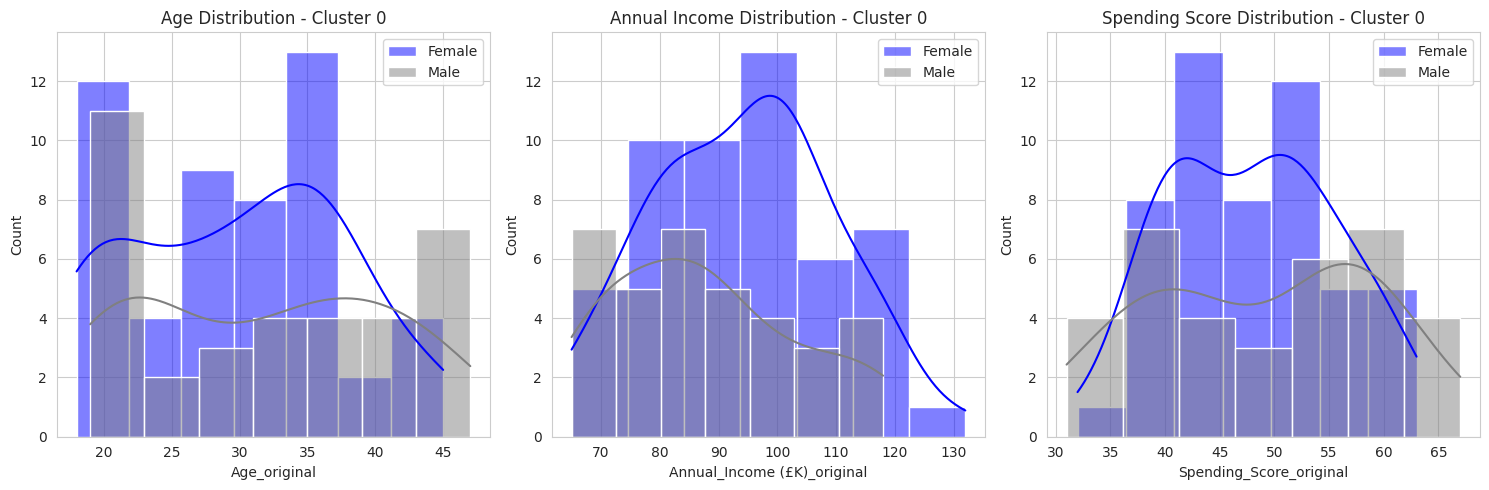

Cluster 0 Statistics:
       Age_original  Annual_Income (£K)_original  Spending_Score_original
count     87.000000                    87.000000                87.000000
mean      30.632184                    91.708046                48.303448
std        8.451166                    15.722649                 8.747989
min       18.000000                    65.000000                31.000000
25%       22.000000                    80.000000                41.000000
50%       31.000000                    90.000000                49.000000
75%       37.000000                   102.500000                55.500000
max       47.000000                   132.000000                67.000000
--------------------


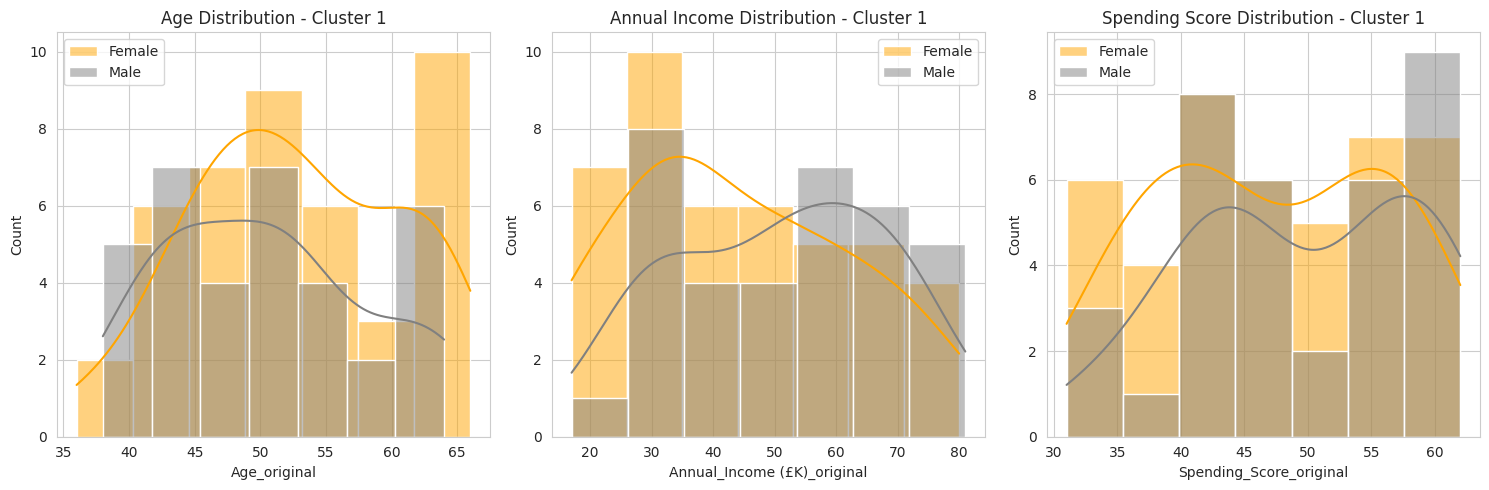

Cluster 1 Statistics:
       Age_original  Annual_Income (£K)_original  Spending_Score_original
count     78.000000                    78.000000                78.000000
mean      51.700000                    46.971795                48.294872
std        7.840272                    18.069555                 9.092753
min       36.000000                    17.000000                31.000000
25%       45.000000                    32.000000                41.000000
50%       51.000000                    47.000000                47.500000
75%       57.750000                    62.250000                56.750000
max       66.000000                    81.000000                62.000000
--------------------


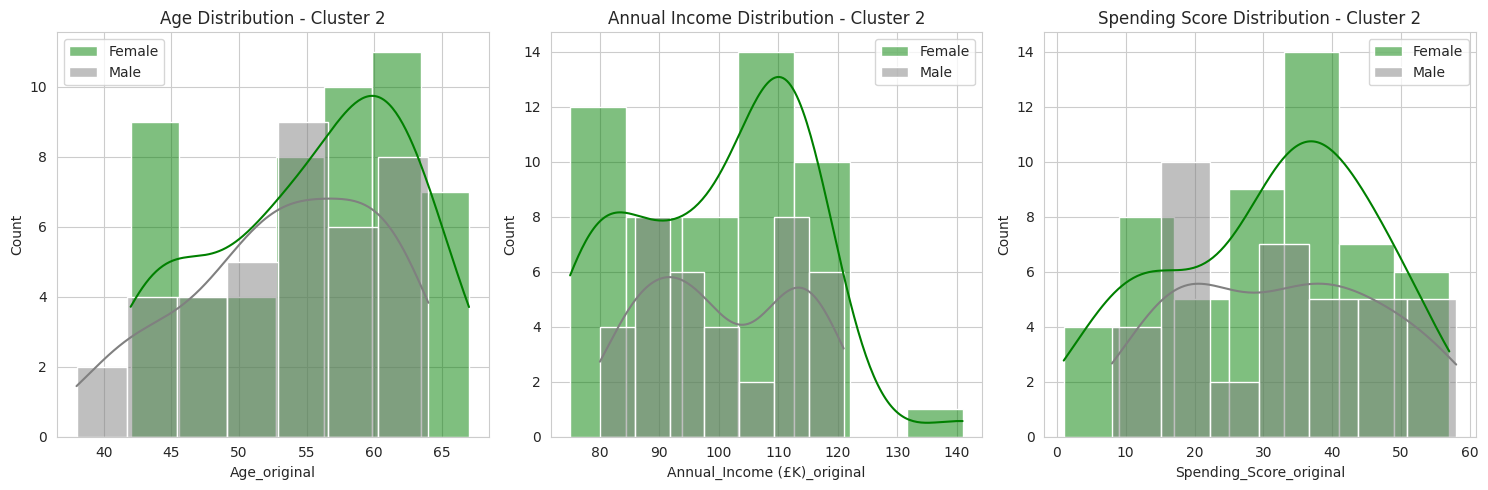

Cluster 2 Statistics:
       Age_original  Annual_Income (£K)_original  Spending_Score_original
count     91.000000                    91.000000                91.000000
mean      54.606593                   100.230769                31.661538
std        7.162833                    13.918874                14.676533
min       38.000000                    75.000000                 1.000000
25%       49.500000                    88.000000                20.000000
50%       55.000000                   101.000000                33.000000
75%       61.000000                   112.000000                43.000000
max       67.000000                   141.000000                58.000000
--------------------


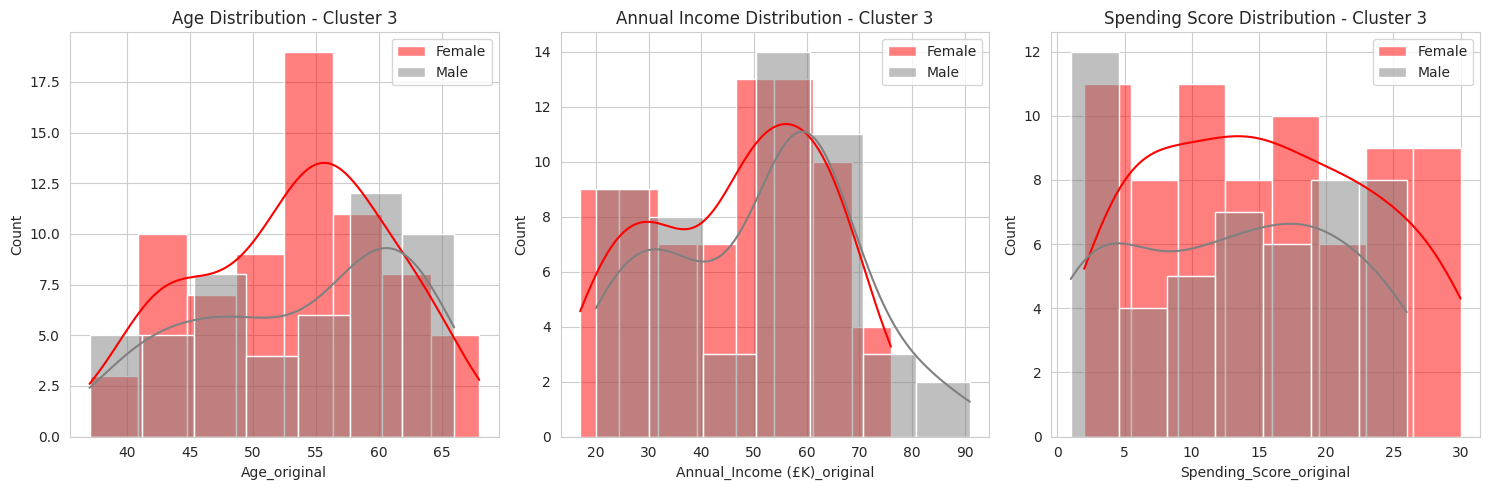

Cluster 3 Statistics:
       Age_original  Annual_Income (£K)_original  Spending_Score_original
count    122.000000                   122.000000               122.000000
mean      53.504918                    48.208197                14.424590
std        7.976213                    17.215914                 8.282435
min       37.000000                    17.000000                 1.000000
25%       47.000000                    33.000000                 7.000000
50%       55.000000                    51.500000                14.500000
75%       60.000000                    61.000000                21.000000
max       68.000000                    91.000000                30.000000
--------------------


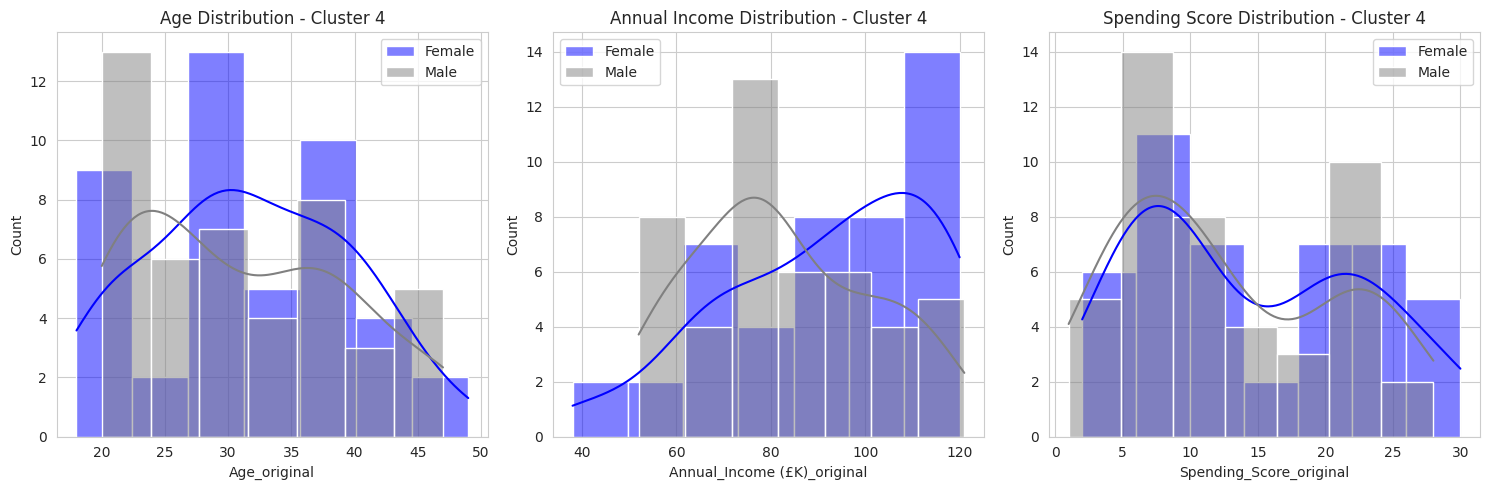

Cluster 4 Statistics:
       Age_original  Annual_Income (£K)_original  Spending_Score_original
count     91.000000                    91.000000                91.000000
mean      31.287912                    87.336264                13.595604
std        8.133946                    21.022018                 8.123052
min       18.000000                    38.000000                 1.000000
25%       23.500000                    71.500000                 7.000000
50%       30.000000                    87.000000                11.000000
75%       38.000000                   106.500000                21.000000
max       49.000000                   121.000000                30.000000
--------------------


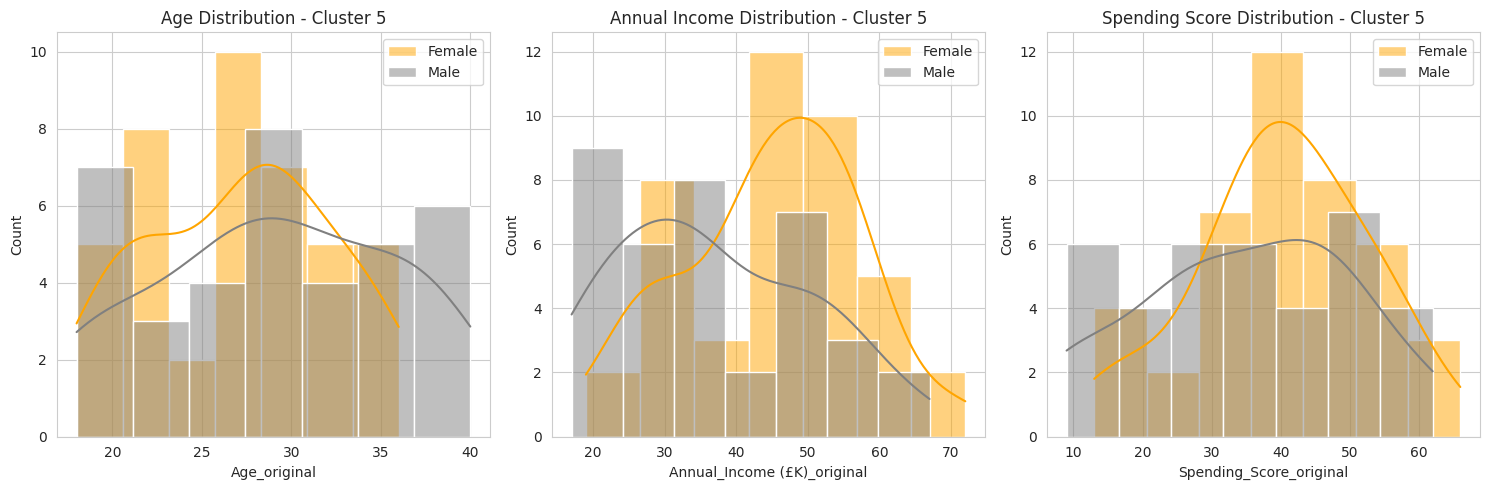

Cluster 5 Statistics:
       Age_original  Annual_Income (£K)_original  Spending_Score_original
count     79.000000                    79.000000                79.000000
mean      28.058228                    41.136709                37.756962
std        5.983409                    13.415053                13.948134
min       18.000000                    17.000000                 9.000000
25%       23.500000                    30.500000                29.000000
50%       28.000000                    42.000000                39.000000
75%       33.000000                    51.400000                47.000000
max       40.000000                    72.000000                66.000000
--------------------


In [ ]:
# Group data by cluster
grouped = df.groupby('Cluster_k')

# Define colors for each cluster (you can add more if you have more clusters)
cluster_colors = ['blue', 'orange', 'green', 'red']
# Iterate through each cluster and create analysis plots
for cluster_label, cluster_data in grouped:
    plt.figure(figsize=(15, 5))  # Adjust figure size as needed

    # Get the color for the current cluster using modulo operator
    color = cluster_colors[cluster_label % len(cluster_colors)]

    # Plot Age distribution, divided by Gender_Male
    plt.subplot(1, 3, 1)
    sns.histplot(cluster_data[cluster_data['Gender_Male'] == 0]['Age_original'],
                 kde=True, color=color, label='Female')
    sns.histplot(cluster_data[cluster_data['Gender_Male'] == 1]['Age_original'],
                 kde=True, color='gray', label='Male')
    plt.title(f'Age Distribution - Cluster {cluster_label}')
    plt.legend()  # Add legend to distinguish genders

    # Plot Annual Income distribution, divided by Gender_Male
    plt.subplot(1, 3, 2)
    sns.histplot(cluster_data[cluster_data['Gender_Male'] == 0]['Annual_Income (£K)_original'],
                 kde=True, color=color, label='Female')
    sns.histplot(cluster_data[cluster_data['Gender_Male'] == 1]['Annual_Income (£K)_original'],
                 kde=True, color='gray', label='Male')
    plt.title(f'Annual Income Distribution - Cluster {cluster_label}')
    plt.legend()

    # Plot Spending Score distribution, divided by Gender_Male
    plt.subplot(1, 3, 3)
    sns.histplot(cluster_data[cluster_data['Gender_Male'] == 0]['Spending_Score_original'],
                 kde=True, color=color, label='Female')
    sns.histplot(cluster_data[cluster_data['Gender_Male'] == 1]['Spending_Score_original'],
                 kde=True, color='gray', label='Male')
    plt.title(f'Spending Score Distribution - Cluster {cluster_label}')
    plt.legend()

    plt.tight_layout() # Adjust layout to prevent overlapping
    plt.show() # Show the plot for the current cluster

    # Additional analysis (example: descriptive statistics)
    print(f"Cluster {cluster_label} Statistics:")
    print(cluster_data[['Age_original', 'Annual_Income (£K)_original', 'Spending_Score_original']].describe())
    print("-" * 20)

In [ ]:
# Group data by cluster and sort by mean Spending_Score in descending order
cluster_spending = df.groupby('Cluster_k')['Spending_Score_original'].mean().sort_values(ascending=False)

# Print the cluster rankings
print("Cluster Ranking by Mean Spending Score:")
for cluster, mean_spending in cluster_spending.items():
    print(f"Cluster {cluster}: {mean_spending:.2f}")

# Further analysis to show age distribution within each cluster
for cluster_label in cluster_spending.index:
    cluster_data = df[df['Cluster_k'] == cluster_label]
    print(f"\nAge Distribution for Cluster {cluster_label}:")
    print(cluster_data['Age_original'].describe())


Cluster Ranking by Mean Spending Score:
Cluster 0: 48.30
Cluster 1: 48.29
Cluster 5: 37.76
Cluster 2: 31.66
Cluster 3: 14.42
Cluster 4: 13.60

Age Distribution for Cluster 0:
count    87.000000
mean     30.632184
std       8.451166
min      18.000000
25%      22.000000
50%      31.000000
75%      37.000000
max      47.000000
Name: Age_original, dtype: float64

Age Distribution for Cluster 1:
count    78.000000
mean     51.700000
std       7.840272
min      36.000000
25%      45.000000
50%      51.000000
75%      57.750000
max      66.000000
Name: Age_original, dtype: float64

Age Distribution for Cluster 5:
count    79.000000
mean     28.058228
std       5.983409
min      18.000000
25%      23.500000
50%      28.000000
75%      33.000000
max      40.000000
Name: Age_original, dtype: float64

Age Distribution for Cluster 2:
count    91.000000
mean     54.606593
std       7.162833
min      38.000000
25%      49.500000
50%      55.000000
75%      61.000000
max      67.000000
Name: Age_ori

In [ ]:
# prompt: cluster_means = df.groupby('Cluster_k')[['Annual_Income (£K)_original', 'Age_original', 'Spending_Score_original']].mean() and rank it

# Assuming 'df' is your DataFrame with 'Cluster_k', 'Annual_Income (£K)_original', 'Age_original', and 'Spending_Score_original' columns.

cluster_means = df.groupby('Cluster_k')[['Annual_Income (£K)_original', 'Age_original', 'Spending_Score_original']].mean()

# Rank clusters based on Spending_Score
cluster_means_ranked = cluster_means.sort_values('Spending_Score_original', ascending=False)

print("Cluster Means Ranked by Spending Score:")
cluster_means_ranked


Cluster Means Ranked by Spending Score:


Annual_Income (£K)_original  Age_original  Spending_Score_original
Cluster_k                                                                    
0                            91.708046     30.632184                48.303448
1                            46.971795     51.700000                48.294872
5                            41.136709     28.058228                37.756962
2                           100.230769     54.606593                31.661538
3                            48.208197     53.504918                14.424590
4                            87.336264     31.287912                13.595604

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Group data by GMM cluster
grouped = df.groupby('Cluster_k')

for cluster_label, cluster_data in grouped:
    # Create 2 rows, 2 columns layout
    fig = make_subplots(
        rows=2, cols=2,
        specs=[
            [{"type": "histogram"}, {"type": "pie"}],
            [{"type": "box"}, {"type": "violin"}]
        ],
        subplot_titles=(
            f'Spending Score Distribution - Cluster {cluster_label}',
            f'Gender Distribution - Cluster {cluster_label}',
            f'Age Box Plot - Cluster {cluster_label}',
            f'Annual Income Violin Plot - Cluster {cluster_label}'
        )
    )

    # 1. Spending Score Histogram
    fig.add_trace(
        go.Histogram(
            x=cluster_data['Spending_Score_original'],
            nbinsx=10,
            marker_color='skyblue',
            name='Spending Score'
        ),
        row=1, col=1
    )
    fig.update_xaxes(title_text="Spending Score", row=1, col=1)
    fig.update_yaxes(title_text="Frequency", row=1, col=1)

    # 2. Gender Pie Chart
    gender_counts = cluster_data['Gender_Male'].value_counts()
    fig.add_trace(
        go.Pie(
            labels=['Male', 'Female'],
            values=[gender_counts.get(1, 0), gender_counts.get(0, 0)],
            marker_colors=['skyblue', 'lightcoral'],
            textinfo='percent+label',
            name='Gender'
        ),
        row=1, col=2
    )

    # 3. Age Box Plot (updated to use 'Age_original')
    fig.add_trace(
        go.Box(
            y=cluster_data['Age_original'],
            name='Age',
            marker_color='lightgreen',
            boxmean='sd'  # adds mean and std
        ),
        row=2, col=1
    )
    fig.update_yaxes(title_text="Age", row=2, col=1)

    # 4. Annual Income Violin Plot (updated to use 'Annual_Income (£K)_original')
    fig.add_trace(
        go.Violin(
            y=cluster_data['Annual_Income (£K)_original'],
            box_visible=True,
            meanline_visible=True,
            line_color='orange',
            name='Annual Income (£K)'
        ),
        row=2, col=2
    )
    fig.update_yaxes(title_text="Annual Income (£K)", row=2, col=2)

    # Layout
    fig.update_layout(
        title_text=f'Cluster {cluster_label} Detailed Analysis',
        showlegend=False,
        height=900,
        width=1000
    )

    fig.show()


<ipython-input-297-f7c38ea64bfc>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


Box Plot for Age: Reveals skewness, outliers, and concentration.

Violin Plot for Income: Gives shape of distribution + stats.

Pie & Histogram: Stay as-is because they’re naturally suitable.

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Group data by GMM cluster
grouped = df.groupby('Cluster_gmm')

for cluster_label, cluster_data in grouped:
    # Create 2 rows, 2 columns layout
    fig = make_subplots(
        rows=2, cols=2,
        specs=[
            [{"type": "histogram"}, {"type": "pie"}],
            [{"type": "box"}, {"type": "violin"}]
        ],
        subplot_titles=(
            f'Spending Score Distribution - Cluster {cluster_label}',
            f'Gender Distribution - Cluster {cluster_label}',
            f'Age Box Plot - Cluster {cluster_label}',
            f'Annual Income Violin Plot - Cluster {cluster_label}'
        )
    )

    # 1. Spending Score Histogram
    fig.add_trace(
        go.Histogram(
            x=cluster_data['Spending_Score_original'],
            nbinsx=10,
            marker_color='skyblue',
            name='Spending Score'
        ),
        row=1, col=1
    )
    fig.update_xaxes(title_text="Spending Score", row=1, col=1)
    fig.update_yaxes(title_text="Frequency", row=1, col=1)

    # 2. Gender Pie Chart
    gender_counts = cluster_data['Gender_Male'].value_counts()
    fig.add_trace(
        go.Pie(
            labels=['Male', 'Female'],
            values=[gender_counts.get(1, 0), gender_counts.get(0, 0)],
            marker_colors=['skyblue', 'lightcoral'],
            textinfo='percent+label',
            name='Gender'
        ),
        row=1, col=2
    )

    # 3. Age Box Plot (updated to use 'Age_original')
    fig.add_trace(
        go.Box(
            y=cluster_data['Age_original'],
            name='Age',
            marker_color='lightgreen',
            boxmean='sd'  # adds mean and std
        ),
        row=2, col=1
    )
    fig.update_yaxes(title_text="Age", row=2, col=1)

    # 4. Annual Income Violin Plot (updated to use 'Annual_Income (£K)_original')
    fig.add_trace(
        go.Violin(
            y=cluster_data['Annual_Income (£K)_original'],
            box_visible=True,
            meanline_visible=True,
            line_color='orange',
            name='Annual Income (£K)'
        ),
        row=2, col=2
    )
    fig.update_yaxes(title_text="Annual Income (£K)", row=2, col=2)

    # Layout
    fig.update_layout(
        title_text=f'Cluster {cluster_label} Detailed Analysis',
        showlegend=False,
        height=900,
        width=1000
    )

    fig.show()


<ipython-input-298-4ed6ee230fa2>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          548 non-null    float64
 1   Annual_Income (£K)           548 non-null    float64
 2   Spending_Score               548 non-null    float64
 3   Gender_Female                548 non-null    bool   
 4   Gender_Male                  548 non-null    bool   
 5   Age_original                 548 non-null    float64
 6   Annual_Income (£K)_original  548 non-null    float64
 7   Spending_Score_original      548 non-null    float64
 8   Cluster_h                    548 non-null    int32  
 9   Cluster_gmm                  548 non-null    int64  
 10  Cluster_k                    548 non-null    int32  
dtypes: bool(2), float64(6), int32(2), int64(1)
memory usage: 35.4 KB


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Get number of clusters
cluster_labels = sorted(df['Cluster_k'].unique())
n_clusters = len(cluster_labels)

# Create 4 rows (1 per metric) and N columns (1 per cluster)
fig = make_subplots(
    rows=4, cols=n_clusters,
    subplot_titles=[
        f'Cluster {cl} - Spending Score' for cl in cluster_labels
    ] + [
        f'Cluster {cl} - Gender' for cl in cluster_labels
    ] + [
        f'Cluster {cl} - Age' for cl in cluster_labels
    ] + [
        f'Cluster {cl} - Income' for cl in cluster_labels
    ],
    specs=[[{"type": "histogram"} for _ in cluster_labels],
           [{"type": "pie"} for _ in cluster_labels],
           [{"type": "box"} for _ in cluster_labels],
           [{"type": "violin"} for _ in cluster_labels]],
    vertical_spacing=0.1,
    horizontal_spacing=0.03
)

# Plot per cluster
for idx, cluster_label in enumerate(cluster_labels):
    cluster_data = df[df['Cluster_k'] == cluster_label]
    col = idx + 1

    # Row 1: Spending Score Histogram
    fig.add_trace(
        go.Histogram(
            x=cluster_data['Spending_Score_original'],
            nbinsx=10,
            marker_color='skyblue',
            name=f'Cluster {cluster_label}'
        ),
        row=1, col=col
    )

    # Row 2: Gender Pie
    gender_counts = cluster_data['Gender_Male'].value_counts()
    fig.add_trace(
        go.Pie(
            labels=['Male', 'Female'],
            values=[gender_counts.get(1, 0), gender_counts.get(0, 0)],
            marker_colors=['skyblue', 'lightcoral'],
            textinfo='percent',
            hole=0.4,
            name=f'Gender {cluster_label}'
        ),
        row=2, col=col
    )

    # Row 3: Age Box
    fig.add_trace(
        go.Box(
            y=cluster_data['Age_original'],
            name=f'Age {cluster_label}',
            marker_color='lightgreen',
            boxmean='sd'
        ),
        row=3, col=col
    )

    # Row 4: Income Violin
    fig.add_trace(
        go.Violin(
            y=cluster_data['Annual_Income (£K)_original'],
            box_visible=True,
            meanline_visible=True,
            line_color='orange',
            name=f'Income {cluster_label}'
        ),
        row=4, col=col
    )

# Update layout
fig.update_layout(
    height=1800,
    width=300 * n_clusters,
    title_text='Cluster Comparison Dashboard',
    showlegend=False
)

# Axis labels for each row
fig.update_yaxes(title_text="Spending Score", row=1, col=1)
fig.update_yaxes(title_text="Age", row=3, col=1)
fig.update_yaxes(title_text="Annual Income (£K)", row=4, col=1)

fig.show()


<ipython-input-300-6b5b9ac016ef>:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Get number of clusters
cluster_labels = sorted(df['Cluster_gmm'].unique())
n_clusters = len(cluster_labels)

# Create 4 rows (1 per metric) and N columns (1 per cluster)
fig = make_subplots(
    rows=4, cols=n_clusters,
    subplot_titles=[
        f'Cluster {cl} - Spending Score' for cl in cluster_labels
    ] + [
        f'Cluster {cl} - Gender' for cl in cluster_labels
    ] + [
        f'Cluster {cl} - Age' for cl in cluster_labels
    ] + [
        f'Cluster {cl} - Income' for cl in cluster_labels
    ],
    specs=[[{"type": "histogram"} for _ in cluster_labels],
           [{"type": "pie"} for _ in cluster_labels],
           [{"type": "box"} for _ in cluster_labels],
           [{"type": "violin"} for _ in cluster_labels]],
    vertical_spacing=0.1,
    horizontal_spacing=0.03
)

# Plot per cluster
for idx, cluster_label in enumerate(cluster_labels):
    cluster_data = df[df['Cluster_k'] == cluster_label]
    col = idx + 1

    # Row 1: Spending Score Histogram
    fig.add_trace(
        go.Histogram(
            x=cluster_data['Spending_Score_original'],
            nbinsx=10,
            marker_color='skyblue',
            name=f'Cluster {cluster_label}'
        ),
        row=1, col=col
    )

    # Row 2: Gender Pie
    gender_counts = cluster_data['Gender_Male'].value_counts()
    fig.add_trace(
        go.Pie(
            labels=['Male', 'Female'],
            values=[gender_counts.get(1, 0), gender_counts.get(0, 0)],
            marker_colors=['skyblue', 'lightcoral'],
            textinfo='percent',
            hole=0.4,
            name=f'Gender {cluster_label}'
        ),
        row=2, col=col
    )

    # Row 3: Age Box
    fig.add_trace(
        go.Box(
            y=cluster_data['Age_original'],
            name=f'Age {cluster_label}',
            marker_color='lightgreen',
            boxmean='sd'
        ),
        row=3, col=col
    )

    # Row 4: Income Violin
    fig.add_trace(
        go.Violin(
            y=cluster_data['Annual_Income (£K)_original'],
            box_visible=True,
            meanline_visible=True,
            line_color='orange',
            name=f'Income {cluster_label}'
        ),
        row=4, col=col
    )

# Update layout
fig.update_layout(
    height=1800,
    width=300 * n_clusters,
    title_text='Cluster Comparison Dashboard',
    showlegend=False
)

# Axis labels for each row
fig.update_yaxes(title_text="Spending Score", row=1, col=1)
fig.update_yaxes(title_text="Age", row=3, col=1)
fig.update_yaxes(title_text="Annual Income (£K)", row=4, col=1)

fig.show()


<ipython-input-301-9ae502fd71b8>:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          548 non-null    float64
 1   Annual_Income (£K)           548 non-null    float64
 2   Spending_Score               548 non-null    float64
 3   Gender_Female                548 non-null    bool   
 4   Gender_Male                  548 non-null    bool   
 5   Age_original                 548 non-null    float64
 6   Annual_Income (£K)_original  548 non-null    float64
 7   Spending_Score_original      548 non-null    float64
 8   Cluster_h                    548 non-null    int32  
 9   Cluster_gmm                  548 non-null    int64  
 10  Cluster_k                    548 non-null    int32  
dtypes: bool(2), float64(6), int32(2), int64(1)
memory usage: 35.4 KB


### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data (assuming your dataset is in a pandas DataFrame called 'data')
X = df[[ 'Gender_Female', 'Gender_Male',
          'Age_original', 'Annual_Income (£K)_original', 'Spending_Score_original']]
y = df['Cluster_k']  # Target: K-Means Cluster label

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.9545454545454546
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       1.00      0.92      0.96        13
           2       0.86      0.92      0.89        13
           3       1.00      1.00      1.00        21
           4       0.91      1.00      0.95        20
           5       1.00      0.91      0.95        23

    accuracy                           0.95       110
   macro avg       0.95      0.95      0.95       110
weighted avg       0.96      0.95      0.95       110



In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix using Plotly
fig = go.Figure(data=go.Heatmap(z=conf_matrix,
                                x=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'],  # 6 clusters
                                y=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'],  # 6 clusters
                                colorscale='Viridis',
                                colorbar=dict(title='Count')))

fig.update_layout(title='Confusion Matrix - Random Forest Classifier',
                  xaxis_title='Predicted Cluster',
                  yaxis_title='True Cluster')

fig.show()


In [ ]:
# Extracting precision, recall, and F1-score from the classification report
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Get unique cluster labels from y_test (true labels)
unique_clusters = sorted(y_test.unique())

# Ensure the classification report includes all 6 clusters (if they exist in the data)
# Filter report_df to include only clusters present in y_test
report_df = report_df[report_df.index.isin(map(str, unique_clusters))]

# Before plotting, reset the index to ensure alignment
report_df = report_df.reset_index()

# Plotting using Plotly
fig = px.bar(report_df.iloc[:-1, :],  # Exclude the 'accuracy' row if present
             x='index',  # Use the reset index as the x-axis
             y=['precision', 'recall', 'f1-score'],
             title='Precision, Recall, and F1 Score per Cluster',
             labels={'index': 'Cluster', 'value': 'Score'},
             barmode='group')

fig.show()


Grid search uisng hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best model
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
best_rf = RandomForestClassifier(max_depth=20, min_samples_split=2, n_estimators=50, random_state=42)
best_rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, n_estimators=50, random_state=42)

In [ ]:
y_pred = best_rf.predict(X_test)


In [ ]:
y_pred

array([2, 2, 5, 2, 3, 4, 0, 5, 1, 4, 3, 3, 4, 3, 0, 5, 5, 1, 0, 5, 2, 5,
       0, 5, 0, 0, 3, 2, 4, 5, 0, 4, 3, 4, 5, 0, 5, 1, 1, 2, 5, 3, 3, 2,
       2, 2, 4, 3, 0, 4, 0, 4, 3, 4, 0, 0, 2, 2, 0, 0, 0, 4, 4, 3, 5, 5,
       4, 1, 0, 1, 4, 4, 0, 4, 2, 1, 5, 5, 3, 2, 3, 4, 5, 1, 3, 0, 3, 0,
       0, 4, 4, 5, 3, 1, 5, 2, 4, 3, 1, 4, 3, 3, 1, 5, 3, 3, 1, 4, 5, 5],
      dtype=int32)

In [ ]:
import plotly.express as px
import pandas as pd

# Assuming your trained model is named best_rf
importances = best_rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for Plotly
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot
fig = px.bar(feature_df, x='Importance', y='Feature', orientation='h',
             title='Feature Importance - Random Forest',
             color='Importance', color_continuous_scale='Viridis')

fig.update_layout(yaxis=dict(autorange="reversed"))  # Reverse y-axis to show most important first
fig.show()


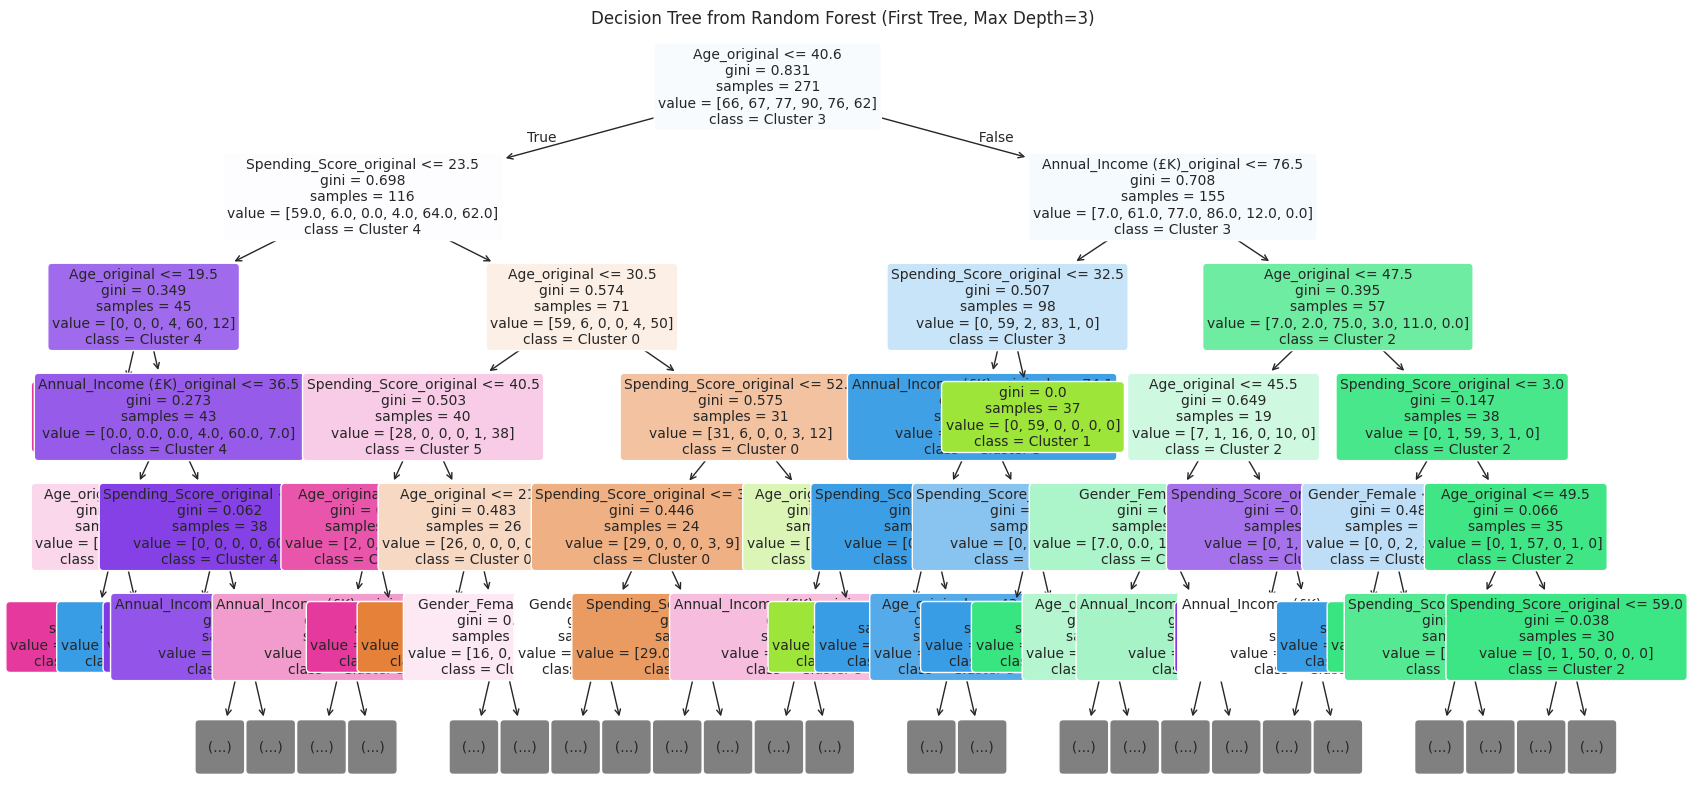

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Select one tree from the forest
tree = best_rf.estimators_[0]

# Set up the plot size
plt.figure(figsize=(20, 10))  # You can increase this for more depth

# Plot the decision tree
plot_tree(tree,
          feature_names=X_train.columns,
          class_names=[f"Cluster {i}" for i in sorted(y_train.unique())],
          filled=True,
          rounded=True,
          max_depth=5,  # Limit depth for readability; increase if needed
          fontsize=10)

# Show the plot
plt.title("Decision Tree from Random Forest (First Tree, Max Depth=3)")
plt.show()


Colored nodes = predicted cluster class.



Each split shows the feature, condition, Gini, and number of samples.

Useful for understanding how clusters are formed based on decision paths.

In [ ]:
import plotly.express as px
import pandas as pd

# Get feature importances from the full forest
importances = best_rf.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot with Plotly
fig = px.bar(importance_df, x='Feature', y='Importance',
             title='Feature Importance - Random Forest',
             text_auto='.2s')
fig.show()


In [ ]:
X_train.columns


Index(['Gender_Female', 'Gender_Male', 'Age_original',
       'Annual_Income (£K)_original', 'Spending_Score_original'],
      dtype='object')

In [ ]:
# Make sure to use the same column names and order as X_train
new_customer = pd.DataFrame([{
    'Age_original': 32,
    'Annual_Income (£K)_original': 70,
    'Spending_Score_original': 85,
    'Gender_Female': True,
    'Gender_Male': False
}])

# Reorder columns to exactly match training set
new_customer = new_customer[X_train.columns]

# Now predict
predicted_cluster = best_rf.predict(new_customer)
print(f"Predicted Cluster: {predicted_cluster[0]}")

Predicted Cluster: 0


In [ ]:
cluster_k_info = {}

for i in range(num_clusters):
    cluster_k_info[i] = df[df['Cluster_k'] == i]


In [ ]:
predicted_cluster = best_rf.predict(new_customer)[0]


In [ ]:
similar_customers = cluster_k_info[predicted_cluster]


In [ ]:
similar_customers

Age  Annual_Income (£K)  Spending_Score  Gender_Female  Gender_Male  \
3   -1.607396            0.783774        0.574354           True        False   
9   -0.747902            0.544661        0.574354           True        False   
19  -1.679021            1.671908        1.188481           True        False   
31  -1.750645           -0.138518        1.467630           True        False   
38  -1.177649            1.057046        0.686013           True        False   
..        ...                 ...             ...            ...          ...   
527 -0.962775            1.022887        1.300141           True        False   
530 -0.461403            0.442184        1.020992           True        False   
534 -0.389779            0.360203        1.076822           True        False   
539 -0.819526            1.535272        0.351035           True        False   
546 -0.389779            0.134753        1.411800          False         True   

     Age_original  Annual_Income (£K)_original  Spending_Score_original  \
3            20.0                         92.0                     41.0   
9            32.0                         85.0                     41.0   
19           19.0                        118.0                     52.0   
31           18.0                         65.0                     57.0   
38           26.0                        100.0                     43.0   
..            ...                          ...                      ...   
527          29.0                         99.0                     54.0   
530          36.0                         82.0                     49.0   
534          37.0                         79.6                     50.0   
539          31.0                        114.0                     37.0   
546          37.0                         73.0                     56.0   

     Cluster_h  Cluster_gmm  Cluster_k  
3            1            0          0  
9            2            0          0  
19           1            0          0  
31           1            0          0  
38           1            0          0  
..         ...          ...        ...  
527          1            0          0  
530          1            0          0  
534          1            0          0  
539          2            0          0  
546          1            0          0  

[87 rows x 11 columns]

In [ ]:
import plotly.graph_objects as go

# Get average of existing cluster
cluster_mean = similar_customers[X_train.columns].mean()

# Add the new customer
trace1 = go.Scatterpolar(r=cluster_mean, theta=X_train.columns, name='Cluster Mean', line=dict(color='blue'))
trace2 = go.Scatterpolar(r=new_customer.values[0], theta=X_train.columns, name='New Customer', line=dict(color='red'))

fig = go.Figure(data=[trace1, trace2])
fig.update_layout(title='Comparison of New Customer to Cluster Profile', polar=dict(radialaxis=dict(visible=True)))
fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from sklearn.metrics.pairwise import cosine_similarity

def analyze_new_customer(new_data, model, X_train, cluster_info):
    """
    Analyzes new customer: predicts cluster, finds similar customer, plots comparison.

    Args:
        new_data (dict): Input values for new customer.
        model: Trained classifier (e.g., RandomForestClassifier).
        X_train (DataFrame): Feature training data used for model.
        cluster_info (dict): Dictionary containing original data split by cluster.
    """

    # Convert to DataFrame and align columns
    new_customer = pd.DataFrame([new_data])
    new_customer = new_customer[X_train.columns]

    # Handle Gender Features as Binary (0 or 1)
    new_customer['Gender_Female'] = new_customer['Gender_Female'].astype(int)
    new_customer['Gender_Male'] = new_customer['Gender_Male'].astype(int)

    # Predict the cluster
    predicted_cluster = model.predict(new_customer)[0]
    print(f"\n Predicted Cluster: {predicted_cluster}")

    # Get customers from predicted cluster
    similar_customers = cluster_info[predicted_cluster]

    # Handle Gender Features in similar customers as Binary (0 or 1)
    similar_customers['Gender_Female'] = similar_customers['Gender_Female'].astype(int)
    similar_customers['Gender_Male'] = similar_customers['Gender_Male'].astype(int)

    # Compute cosine similarity
    sims = cosine_similarity(similar_customers[X_train.columns], new_customer)
    most_similar_index = sims.argmax()
    most_similar_customer = similar_customers.iloc[most_similar_index]

    print("\n Most similar customer in predicted cluster:")
    print(most_similar_customer[X_train.columns])

    # Get average of cluster
    cluster_mean = similar_customers[X_train.columns].mean()

    # Radar chart comparison with improved style
    trace1 = go.Scatterpolar(
        r=cluster_mean,
        theta=X_train.columns,
        name='Cluster Mean',
        line=dict(color='royalblue', width=3),
        fill='toself',
        fillcolor='rgba(65, 105, 225, 0.3)',
        opacity=0.8
    )

    trace2 = go.Scatterpolar(
        r=new_customer.values[0],
        theta=X_train.columns,
        name='New Customer',
        line=dict(color='darkorange', width=3),
        fill='toself',
        fillcolor='rgba(255, 140, 0, 0.3)',
        opacity=0.8
    )

    # Create figure with layout customizations
    fig = go.Figure(data=[trace1, trace2])

    fig.update_layout(
        title=f'Comparison: New Customer vs Cluster {predicted_cluster}',
        polar=dict(
            radialaxis=dict(visible=True, range=[0, max(cluster_mean.max(), new_customer.values.max()) + 1]), # Use new_customer.values.max() to get a single maximum value
            angularaxis=dict(tickmode='array', tickvals=list(range(len(X_train.columns))), ticktext=X_train.columns)
        ),
        template="plotly_dark",
        font=dict(family="Arial, sans-serif", size=12, color="white"),
        showlegend=True
    )

    # Show the figure
    fig.show()

In [ ]:
new_input = {
    'Age_original': 52,
    'Annual_Income (£K)_original': 50,
    'Spending_Score_original': 65,
    'Gender_Female': False,
    'Gender_Male': True
}

analyze_new_customer(new_input, best_rf, X_train, cluster_k_info)



 Predicted Cluster: 1

 Most similar customer in predicted cluster:
Gender_Female                   1.0
Gender_Male                     0.0
Age_original                   48.0
Annual_Income (£K)_original    49.0
Spending_Score_original        62.0
Name: 363, dtype: float64


<ipython-input-327-7577615506f5>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-327-7577615506f5>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
def find_best_tree_per_cluster(rf_model, X_train, y_train):
    """
    Finds the best performing decision tree within a Random Forest for each cluster.

    Args:
        rf_model: Trained RandomForestClassifier.
        X_train (DataFrame): Feature training data.
        y_train (Series): Target training data.

    Returns:
        dict: Dictionary mapping cluster labels to (tree_index, accuracy) tuples.
    """

    best_tree_per_cluster = {}
    unique_clusters = y_train.unique()

    for cluster in unique_clusters:
        # Get data points belonging to the current cluster
        cluster_indices = y_train[y_train == cluster].index
        X_cluster = X_train.loc[cluster_indices]
        y_cluster = y_train.loc[cluster_indices]

        # Find the best performing tree for this cluster
        best_tree_index = None
        best_tree_accuracy = 0

        for i, tree in enumerate(rf_model.estimators_):
            y_pred = tree.predict(X_cluster)
            accuracy = (y_pred == y_cluster).mean()

            if accuracy > best_tree_accuracy:
                best_tree_accuracy = accuracy
                best_tree_index = i

        best_tree_per_cluster[cluster] = (best_tree_index, best_tree_accuracy)

    return best_tree_per_cluster

# Then you can use it to calculate best_tree_per_cluster like you intended to
best_tree_per_cluster = find_best_tree_per_cluster(best_rf, X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without featur

In [ ]:
for cluster, (tree_idx, acc) in best_tree_per_cluster.items():
    print(f"\n Cluster {cluster}: Best Tree #{tree_idx} | Accuracy: {acc:.2f}")
    rules = get_decision_rules(best_rf.estimators_[tree_idx], X_train.columns, cluster)
    for i, rule in enumerate(rules[:3]):  # Show top 3 rules for brevity
        print(f" Rule {i+1}: {rule}")



 Cluster 2: Best Tree #13 | Accuracy: 1.00
 Rule 1: (Age_original <= 40.60) AND (Annual_Income (£K)_original > 63.00) AND (Annual_Income (£K)_original > 70.50) AND (Spending_Score_original <= 31.50) AND (Spending_Score_original > 29.50) AND (Annual_Income (£K)_original > 93.50)
 Rule 2: (Age_original > 40.60) AND (Annual_Income (£K)_original > 72.00) AND (Annual_Income (£K)_original <= 79.90) AND (Age_original <= 57.50) AND (Spending_Score_original > 17.00) AND (Spending_Score_original <= 42.50)
 Rule 3: (Age_original > 40.60) AND (Annual_Income (£K)_original > 72.00) AND (Annual_Income (£K)_original > 79.90) AND (Spending_Score_original <= 47.00) AND (Age_original <= 47.50) AND (Spending_Score_original > 15.00)

 Cluster 0: Best Tree #33 | Accuracy: 1.00
 Rule 1: (Age_original <= 40.60) AND (Annual_Income (£K)_original > 58.50) AND (Spending_Score_original > 30.50) AND (Annual_Income (£K)_original <= 68.50) AND (Spending_Score_original > 46.00)
 Rule 2: (Age_original <= 40.60) AND (A

In [ ]:
import streamlit as st
import pandas as pd
import joblib
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from plotly.subplots import make_subplots
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, dendrogram

# ---- Load Pretrained Artifacts ----
model = joblib.load("best_rf.pkl")
X_train = joblib.load("X_train.pkl")
cluster_k_info = joblib.load("cluster_k_info.pkl")

# ---- Function to Analyze New Customer ----
def analyze_new_customer(new_data, model, X_train, cluster_info):
    new_customer = pd.DataFrame([new_data])
    new_customer = new_customer[X_train.columns]

    new_customer['Gender_Female'] = new_customer['Gender_Female'].astype(int)
    new_customer['Gender_Male'] = new_customer['Gender_Male'].astype(int)

    predicted_cluster = model.predict(new_customer)[0]
    st.subheader(f" Predicted Cluster: {predicted_cluster}")

    similar_customers = cluster_info[predicted_cluster].copy()
    similar_customers['Gender_Female'] = similar_customers['Gender_Female'].astype(int)
    similar_customers['Gender_Male'] = similar_customers['Gender_Male'].astype(int)

    sims = cosine_similarity(similar_customers[X_train.columns], new_customer)
    most_similar_index = sims.argmax()
    most_similar_customer = similar_customers.iloc[most_similar_index]

    st.subheader(" Most Similar Customer in Cluster:")
    st.dataframe(most_similar_customer[X_train.columns])

    cluster_mean = similar_customers[X_train.columns].mean()
    cluster_mean_max = cluster_mean.max()
    new_customer_max = new_customer.max().values[0]

    trace1 = go.Scatterpolar(
        r=cluster_mean,
        theta=X_train.columns,
        name='Cluster Mean',
        line=dict(color='royalblue', width=3),
        fill='toself',
        fillcolor='rgba(65, 105, 225, 0.3)',
        opacity=0.8
    )

    trace2 = go.Scatterpolar(
        r=new_customer.values[0],
        theta=X_train.columns,
        name='New Customer',
        line=dict(color='darkorange', width=3),
        fill='toself',
        fillcolor='rgba(255, 140, 0, 0.3)',
        opacity=0.8
    )

    fig = go.Figure(data=[trace1, trace2])
    fig.update_layout(
        title=f' Comparison: New Customer vs Cluster {predicted_cluster}',
        polar=dict(
            radialaxis=dict(visible=True, range=[0, max(cluster_mean_max, new_customer_max) + 1]),
            angularaxis=dict(tickmode='array', tickvals=list(range(len(X_train.columns))), ticktext=X_train.columns)
        ),
        template="plotly_dark",
        font=dict(family="Arial, sans-serif", size=12, color="white"),
        showlegend=True
    )

    st.plotly_chart(fig)

# ---- Streamlit App UI ----
st.set_page_config(page_title="Customer Cluster Dashboard", layout="wide")
st.title(" Customer Segmentation Analysis Dashboard")

# ---- Sidebar Navigation ----
section = st.sidebar.radio(" Choose Section", ["Cluster Analysis", "Analyze New Customer Data", "Custom Clustering"])

@st.cache_data
def load_data():
    return pd.read_csv("clustering_results.csv")

df = load_data()

if section == "Cluster Analysis":
    st.header("Cluster Analysis with Existing Data")

    feature_importance_section = st.sidebar.checkbox("Show Feature Importance", False)

    if feature_importance_section:
        with st.expander(" Feature Importance Chart"):
            st.subheader("Feature Importance Analysis")
            feature_importances = model.feature_importances_
            feature_names = X_train.columns
            feature_df = pd.DataFrame({
                'Feature': feature_names,
                'Importance': feature_importances
            }).sort_values(by='Importance', ascending=False)

            plt.figure(figsize=(8, 6))
            sns.barplot(x='Importance', y='Feature', data=feature_df, palette='Blues_d')
            st.pyplot(plt.gcf())

    required_columns = ['Age_original', 'Annual_Income (£K)_original', 'Spending_Score_original',
                        'Gender_Male', 'Cluster_gmm', 'Cluster_k']
    missing_cols = [col for col in required_columns if col not in df.columns]
    if missing_cols:
        st.error(f"Missing columns in dataset: {missing_cols}")
        st.stop()

    st.sidebar.header(" Filter Options")
    cluster_method = st.sidebar.selectbox("Clustering Method", ["K-Means", "GMM", "Agglomerative", "DBSCAN"])

    st.sidebar.markdown("### Demographics")
    min_age, max_age = int(df['Age_original'].min()), int(df['Age_original'].max())
    min_income, max_income = int(df['Annual_Income (£K)_original'].min()), int(df['Annual_Income (£K)_original'].max())
    age_range = st.sidebar.slider("Age Range", min_age, max_age, (25, 60))
    income_range = st.sidebar.slider("Income Range (£K)", min_income, max_income, (20, 100))

    df_filtered = df[(df['Age_original'] >= age_range[0]) & (df['Age_original'] <= age_range[1]) &
                     (df['Annual_Income (£K)_original'] >= income_range[0]) &
                     (df['Annual_Income (£K)_original'] <= income_range[1])]

    def apply_clustering(method, df):
        X = df[['Age_original', 'Annual_Income (£K)_original', 'Spending_Score_original']]

        if method == "K-Means":
            return df['Cluster_k'], "Cluster_k"
        elif method == "GMM":
            return df['Cluster_gmm'], "Cluster_gmm"
        elif method == "Agglomerative":
            model = AgglomerativeClustering(n_clusters=5)
            labels = model.fit_predict(X)
            return labels, "Agglomerative"
        elif method == "DBSCAN":
            model = DBSCAN(eps=10, min_samples=5)
            labels = model.fit_predict(X)
            return labels, "DBSCAN"

    labels, label_col = apply_clustering(cluster_method, df_filtered)
    df_filtered['Active_Cluster'] = labels

    st.markdown("###  Clustering Quality Metrics")
    valid_idx = df_filtered['Active_Cluster'] != -1
    X_valid = df_filtered[valid_idx][['Age_original', 'Annual_Income (£K)_original', 'Spending_Score_original']]
    labels_valid = df_filtered[valid_idx]['Active_Cluster']

    if len(set(labels_valid)) > 1:
        sil = silhouette_score(X_valid, labels_valid)
        db = davies_bouldin_score(X_valid, labels_valid)
        ch = calinski_harabasz_score(X_valid, labels_valid)

        st.markdown(f"- **Silhouette Score:** {sil:.2f}")
        st.markdown(f"- **Davies-Bouldin Index:** {db:.2f}")
        st.markdown(f"- **Calinski-Harabasz Score:** {ch:.2f}")
    else:
        st.warning("⚠ Not enough clusters to compute metrics.")

    if cluster_method == "Agglomerative":
        st.markdown("###  Hierarchical Dendrogram")
        X = df_filtered[['Age_original', 'Annual_Income (£K)_original', 'Spending_Score_original']]
        Z = linkage(X, method='ward')
        fig_dendro, ax = plt.subplots(figsize=(10, 4))
        dendrogram(Z, truncate_mode='level', p=5, ax=ax)
        st.pyplot(fig_dendro)

    st.header(" Cluster Ranking by Avg. Spending Score")
    cluster_spending = df_filtered.groupby('Active_Cluster')['Spending_Score_original'].mean().sort_values(ascending=False)
    st.dataframe(cluster_spending.rename("Mean Spending Score").reset_index(), use_container_width=True)

    st.subheader("👥 Cluster Sizes")
    cluster_counts = df_filtered['Active_Cluster'].value_counts().sort_index()
    fig_bar, ax_bar = plt.subplots(figsize=(6, 4))
    sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="Set2", ax=ax_bar)
    ax_bar.set_xlabel("Cluster")
    ax_bar.set_ylabel("Number of Customers")
    ax_bar.set_title("Cluster Sizes")
    st.pyplot(fig_bar)

    if cluster_method != "DBSCAN":
        for cluster_label in sorted(df_filtered['Active_Cluster'].unique()):
            cluster_data = df_filtered[df_filtered['Active_Cluster'] == cluster_label]

            fig = make_subplots(
                rows=2, cols=2,
                specs=[[{"type": "histogram"}, {"type": "pie"}],
                       [{"type": "box"}, {"type": "violin"}]],
                subplot_titles=(
                    f'Spending Score - Cluster {cluster_label}',
                    f'Gender Split - Cluster {cluster_label}',
                    f'Age Box Plot - Cluster {cluster_label}',
                    f'Income Violin - Cluster {cluster_label}'
                )
            )

            fig.add_trace(go.Histogram(x=cluster_data['Spending_Score_original'], nbinsx=10,
                                       marker_color='skyblue'), row=1, col=1)

            gender_counts = cluster_data['Gender_Male'].value_counts()
            fig.add_trace(go.Pie(labels=['Male', 'Female'],
                                 values=[gender_counts.get(1, 0), gender_counts.get(0, 0)],
                                 marker_colors=['skyblue', 'lightcoral'],
                                 textinfo='percent+label'), row=1, col=2)

            fig.add_trace(go.Box(y=cluster_data['Age_original'],
                                 marker_color='lightgreen', boxmean='sd'), row=2, col=1)

            fig.add_trace(go.Violin(y=cluster_data['Annual_Income (£K)_original'],
                                    box_visible=True, meanline_visible=True,
                                    line_color='orange'), row=2, col=2)

            fig.update_layout(
                title_text=f' Cluster {cluster_label} Detailed Analysis',
                showlegend=False, height=900, width=1000
            )

            st.plotly_chart(fig)

elif section == "Analyze New Customer Data":
    st.header("Analyze New Customer Data")
    with st.form(key='customer_form'):
        age = st.number_input('Age', min_value=0, max_value=100, value=32)
        income = st.number_input('Annual Income (£K)', min_value=0, max_value=500, value=70)
        spending_score = st.number_input('Spending Score', min_value=0, max_value=100, value=85)
        gender = st.radio('⚧ Gender', ['Female', 'Male'], index=0)
        submitted = st.form_submit_button("Analyze")

    if submitted:
        gender_female = 1 if gender == 'Female' else 0
        gender_male = 1 if gender == 'Male' else 0

        new_data = {
            'Age_original': age,
            'Annual_Income (£K)_original': income,
            'Spending_Score_original': spending_score,
            'Gender_Female': gender_female,
            'Gender_Male': gender_male
        }

        analyze_new_customer(new_data, model, X_train, cluster_k_info)

elif section == "Custom Clustering":
    st.header(" Custom Clustering")
    st.markdown("Let users experiment with their own clustering parameters.")

    method = st.selectbox("Choose Clustering Algorithm", ["Agglomerative", "DBSCAN"])
    data = df[['Age_original', 'Annual_Income (£K)_original', 'Spending_Score_original']]

    if method == "Agglomerative":
        n_clusters = st.slider("Number of Clusters", 2, 10, 4)
        model = AgglomerativeClustering(n_clusters=n_clusters)
        labels = model.fit_predict(data)

    elif method == "DBSCAN":
        eps = st.slider("Epsilon (eps)", 1.0, 20.0, 10.0)
        min_samples = st.slider("Minimum Samples", 1, 10, 5)
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(data)

    df['Custom_Cluster'] = labels

    st.subheader("Cluster Results")
    st.write(df[['Age_original', 'Annual_Income (£K)_original', 'Spending_Score_original', 'Custom_Cluster']].head())

    fig = px.scatter_3d(df, x='Age_original', y='Annual_Income (£K)_original', z='Spending_Score_original',
                        color=df['Custom_Cluster'].astype(str), title="Custom Clustering Visualization")
    st.plotly_chart(fig)